In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import random as rd

In [3]:
df=pd.DataFrame()

In [20]:
import time
st=time.time()
for i in range(6840):
    temp=pd.read_csv(r'data1\file{}.csv'.format(i))
    df=df.append(temp.iloc[0])
et=time.time()
print(f'time elapsed:{et-st} seconds')

time elapsed:119.35838580131531 seconds


In [5]:
df

Unnamed: 0       Entity Code  Year   Outdoor air pollution   \
0            0  Afghanistan  AFG  1990                     3169   
0            1  Afghanistan  AFG  1991                     3222   
0            2  Afghanistan  AFG  1992                     3395   
0            3  Afghanistan  AFG  1993                     3623   
0            4  Afghanistan  AFG  1994                     3788   
..         ...          ...  ...   ...                      ...   
0         6835     Zimbabwe  ZWE  2015                     2835   
0         6836     Zimbabwe  ZWE  2016                     2781   
0         6837     Zimbabwe  ZWE  2017                     2700   
0         6838     Zimbabwe  ZWE  2018                     2669   
0         6839     Zimbabwe  ZWE  2019                     2680   

    High systolic blood pressure   Diet high in sodium  \
0                           25633                 1045   
0                           25872                 1055   
0                           26309                 1075   
0                           26961                 1103   
0                           27658                 1134   
..                            ...                  ...   
0                           11483                 1063   
0                           11663                 1082   
0                           11819                 1098   
0                           12002                 1117   
0                           12241                 1140   

     Diet low in whole grains   Alcohol use   Diet low in fruits  ...  \
0                         7077           356                3185  ...   
0                         7149           364                3248  ...   
0                         7297           376                3351  ...   
0                         7499           389                3480  ...   
0                         7698           399                3610  ...   
..                         ...           ...                 ...  ...   
0                         1354          4854                1820  ...   
0                         1383          4915                1854  ...   
0                         1409          4992                1883  ...   
0                         1439          5044                1917  ...   
0                         1475          5156                1960  ...   

     High body-mass index    Unsafe sanitation  \
0                     9518                2798   
0                     9489                3254   
0                     9528                4042   
0                     9611                5392   
0                     9675                5418   
..                     ...                 ...   
0                     5636                2879   
0                     5849                2798   
0                     6047                2744   
0                     6248                2608   
0                     6475                2531   

     No access to handwashing facility   \
0                                  4825   
0                                  5127   
0                                  5889   
0                                  7007   
0                                  7421   
..                                  ...   
0                                  4328   
0                                  4295   
0                                  4251   
0                                  4153   
0                                  4113   

     Drug use - Sex: Both - Age: All Ages (Number)  Low bone mineral density  \
0                                              174                       389   
0                                              188                       389   
0                                              211                       393   
0                                              232                       411   
0                                              247                       413   
..                         

In [21]:
df.reset_index(inplace=True)
df.drop(['index','Unnamed: 0'],axis=1,inplace=True)

In [22]:
df.head()

Entity Code  Year   Outdoor air pollution   \
0  Afghanistan  AFG  1990                     3169   
1  Afghanistan  AFG  1991                     3222   
2  Afghanistan  AFG  1992                     3395   
3  Afghanistan  AFG  1993                     3623   
4  Afghanistan  AFG  1994                     3788   

   High systolic blood pressure   Diet high in sodium  \
0                          25633                 1045   
1                          25872                 1055   
2                          26309                 1075   
3                          26961                 1103   
4                          27658                 1134   

    Diet low in whole grains   Alcohol use   Diet low in fruits  \
0                        7077           356                3185   
1                        7149           364                3248   
2                        7297           376                3351   
3                        7499           389                3480   
4                        7698           399                3610   

   Unsafe water source  ...   High body-mass index    Unsafe sanitation  \
0                 3702  ...                    9518                2798   
1                 4309  ...                    9489                3254   
2                 5356  ...                    9528                4042   
3                 7152  ...                    9611                5392   
4                 7192  ...                    9675                5418   

    No access to handwashing facility   \
0                                 4825   
1                                 5127   
2                                 5889   
3                                 7007   
4                                 7421   

    Drug use - Sex: Both - Age: All Ages (Number)  Low bone mineral density  \
0                                             174                       389   
1                                             188                       389   
2                                             211                       393   
3                                             232                       411   
4                                             247                       413   

    Vitamin A deficiency   Child stunting   Discontinued breastfeeding   \
0                   2016              7686                          107   
1                   2056              7886                          121   
2                   2100              8568                          150   
3                   2316              9875                          204   
4                   2665             11031                          204   

   Non-exclusive breastfeeding   Iron deficiency  
0                         2216               564  
1                         2501               611  
2                         3053               700  
3                         3726               773  
4                         3833               812  

[5 rows x 31 columns]

In [23]:
col=[]
for i in df.columns:
    col.append(i.strip().replace(' ','_'))

In [24]:
df.columns=col

In [25]:
df.rename(columns={'Drug_use_-_Sex:_Both_-_Age:_All_Ages_(Number)':'Drug_use','High_body-mass_index':'High_bodymass_index','Non-exclusive_breastfeeding':'Non_exclusive_breastfeeding'}, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13680 entries, 0 to 13679
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Entity                                    13680 non-null  object
 1   Code                                      12300 non-null  object
 2   Year                                      13680 non-null  int64 
 3   Outdoor_air_pollution                     13680 non-null  int64 
 4   High_systolic_blood_pressure              13680 non-null  int64 
 5   Diet_high_in_sodium                       13680 non-null  int64 
 6   Diet_low_in_whole_grains                  13680 non-null  int64 
 7   Alcohol_use                               13680 non-null  int64 
 8   Diet_low_in_fruits                        13680 non-null  int64 
 9   Unsafe_water_source                       13680 non-null  int64 
 10  Secondhand_smoke                          1368

In [95]:
df[df.Code.isnull()]

Entity Code  Year  Outdoor_air_pollution  \
30              African Region (WHO)  NaN  1990                  93970   
31              African Region (WHO)  NaN  1991                  96436   
32              African Region (WHO)  NaN  1992                  99700   
33              African Region (WHO)  NaN  1993                 101913   
34              African Region (WHO)  NaN  1994                 105532   
...                              ...  ...   ...                    ...   
6745  World Bank Upper Middle Income  NaN  2015                1953125   
6746  World Bank Upper Middle Income  NaN  2016                1969630   
6747  World Bank Upper Middle Income  NaN  2017                1965467   
6748  World Bank Upper Middle Income  NaN  2018                1976456   
6749  World Bank Upper Middle Income  NaN  2019                2039121   

      High_systolic_blood_pressure  Diet_high_in_sodium  \
30                          356866                46758   
31                          365975                47439   
32                          377948                48304   
33                          386490                48805   
34                          398794                49520   
...                            ...                  ...   
6745                       4298815              1046866   
6746                       4389967              1065553   
6747                       4440677              1076496   
6748                       4514262              1089508   
6749                       4631739              1114910   

      Diet_low_in_whole_grains  Alcohol_use  Diet_low_in_fruits  \
30                       45763       175615               43476   
31                       46897       179795               44504   
32                       48317       184243               45996   
33                       49393       186482               46972   
34                       50736       191043               48357   
...                        ...          ...                 ...   
6745                    711062       961051              348914   
6746                    724482       968200              350770   
6747                    733454       969102              350295   
6748                    746871       982487              352573   
6749                    765521      1005865              357923   

      Unsafe_water_source  ...  High_bodymass_index  Unsafe_sanitation  \
30                 809960  ...               119182             604349   
31                 829073  ...               123606             618112   
32                 819085  ...               129692             610436   
33                 815640  ...               132880             607549   
34                 832168  ...               139411             619531   
...                   ...  ...                  ...                ...   
6745                34910  ...              1804399              16788   
6746                34179  ...              1860369              16072   
6747                33561  ...              1901543              15374   
6748                32732  ...              1955352              14565   
6749                32326  ...              2031572              14054   

      No_access_to_handwashing_facility  Drug_use  Low_bone_mineral_density  \
30                               473096      8214                     13858   
31                               481775     10201                     14292   
32                               480386     12749                     14774   
33                               480444     15605                     15037   
34                               488628     19030                     15490   
...                                 ...       ...                       ...   
6745                              37778    158483                    131969   
6746                              37789    161699                    135254   
6747                       

### Applying Descriptive Statistics on the data set

In [227]:
df.describe()

Year  Outdoor_air_pollution  High_systolic_blood_pressure  \
count  6840.000000           6.840000e+03                  6.840000e+03   
mean   2004.500000           8.458244e+04                  2.242249e+05   
std       8.656074           3.511973e+05                  8.634691e+05   
min    1990.000000           0.000000e+00                  2.000000e+00   
25%    1997.000000           4.337500e+02                  1.827750e+03   
50%    2004.500000           2.101000e+03                  8.770500e+03   
75%    2012.000000           1.181025e+04                  4.035550e+04   
max    2019.000000           4.506193e+06                  1.084560e+07   

       Diet_high_in_sodium  Diet_low_in_whole_grains   Alcohol_use  \
count         6.840000e+03              6.840000e+03  6.840000e+03   
mean          4.049716e+04              3.869129e+04  5.484860e+04   
std           1.752832e+05              1.479084e+05  2.112090e+05   
min           0.000000e+00              0.000000e+00  0.000000e+00   
25%           1.370000e+02              2.737500e+02  2.637500e+02   
50%           9.695000e+02              1.444000e+03  1.780500e+03   
75%           5.169750e+03              6.773250e+03  8.368000e+03   
max           1.885356e+06              1.844836e+06  2.441973e+06   

       Diet_low_in_fruits  Unsafe_water_source  Secondhand_smoke  \
count        6.840000e+03         6.840000e+03      6.840000e+03   
mean         2.395776e+04         4.408638e+04      3.036401e+04   
std          9.451573e+04         2.020493e+05      1.222861e+05   
min          0.000000e+00         0.000000e+00      1.000000e+00   
25%          1.440000e+02         7.000000e+00      2.090000e+02   
50%          8.345000e+02         1.825000e+02      9.940000e+02   
75%          3.104750e+03         5.599250e+03      4.347750e+03   
max          1.046015e+06         2.450944e+06      1.304318e+06   

       Low_birth_weight  ...  High_bodymass_index  Unsafe_sanitation  \
count      6.840000e+03  ...         6.840000e+03       6.840000e+03   
mean       5.912551e+04  ...         8.986992e+04       3.152155e+04   
std        2.502265e+05  ...         3.450420e+05       1.463434e+05   
min        0.000000e+00  ...         2.000000e+00       0.000000e+00   
25%        1.230000e+02  ...         9.185000e+02       3.000000e+00   
50%        1.057000e+03  ...         3.917000e+03       1.020000e+02   
75%        1.090325e+04  ...         1.796775e+04       3.854000e+03   
max        3.033425e+06  ...         5.019360e+06       1.842275e+06   

       No_access_to_handwashing_facility       Drug_use  \
count                       6.840000e+03    6840.000000   
mean                        2.179989e+04   10285.202047   
std                         9.668259e+04   39960.745145   
min                         0.000000e+00       0.000000   
25%                         1.900000e+01      31.000000   
50%                         2.210000e+02     222.000000   
75%                         3.953500e+03    1224.250000   
max                         1.200349e+06  494492.000000   

       Low_bone_mineral_density  Vitamin_A_deficiency  Child_stunting  \
count               6840.000000           6840.000000     6840.000000   
mean                8182.473246           2471.594444    11164.329678   
std                32403.922936          12718.303403    52866.245579   
min                    0.000000              0.000000        0.000000   
25%                   43.000000              0.000000        1.000000   
50%                  277.000000              2.000000       41.500000   
75%                 1232.000000            230.250000     1563.250000   
max               437884.000000         207555.000000   833449.000000   

       Discontinued_breastfeeding  Non_exclusive_breastfeeding  \
count                 6840.000000                  6840.000000   
mean                   431.456725                  7171.853070   
std                   1901.531732                 31678.4

In [228]:
df.median()

Year                                        2004.5
Outdoor_air_pollution                       2101.0
High_systolic_blood_pressure                8770.5
Diet_high_in_sodium                          969.5
Diet_low_in_whole_grains                    1444.0
Alcohol_use                                 1780.5
Diet_low_in_fruits                           834.5
Unsafe_water_source                          182.5
Secondhand_smoke                             994.0
Low_birth_weight                            1057.0
Child_wasting                                504.0
Unsafe_sex                                   619.0
Diet_low_in_nuts_and_seeds                   252.0
Household_air_pollution_from_solid_fuels     821.0
Diet_low_in_vegetables                       590.5
Low_physical_activity                        521.5
Smoking                                     4987.0
High_fasting_plasma_glucose                 4966.5
Air_pollution                               5748.0
High_bodymass_index            

In [45]:
df.to_csv('stats_data')

In [2]:
df=pd.read_csv('stats_data')
df.drop('Unnamed: 0', axis=1, inplace=True)

#### EDA on the csv file 

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


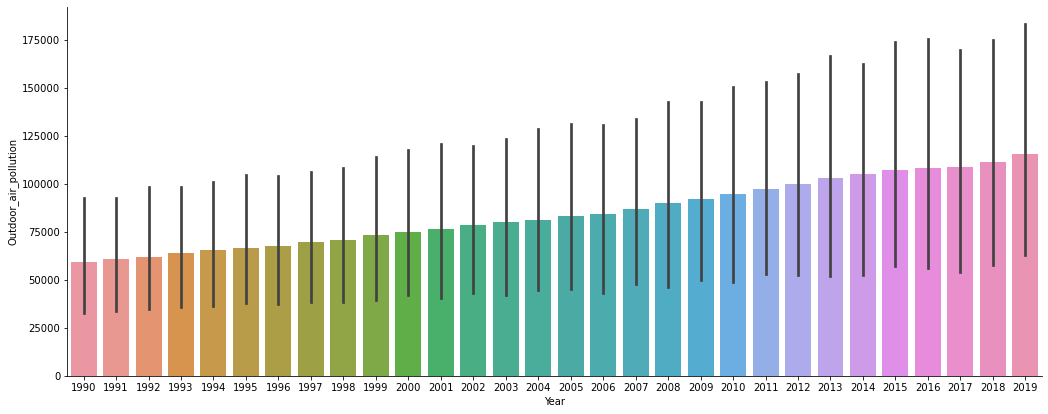

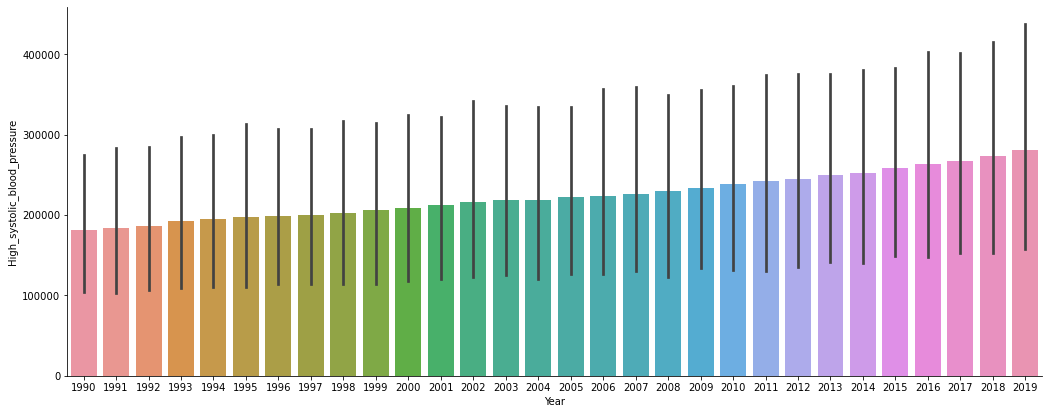

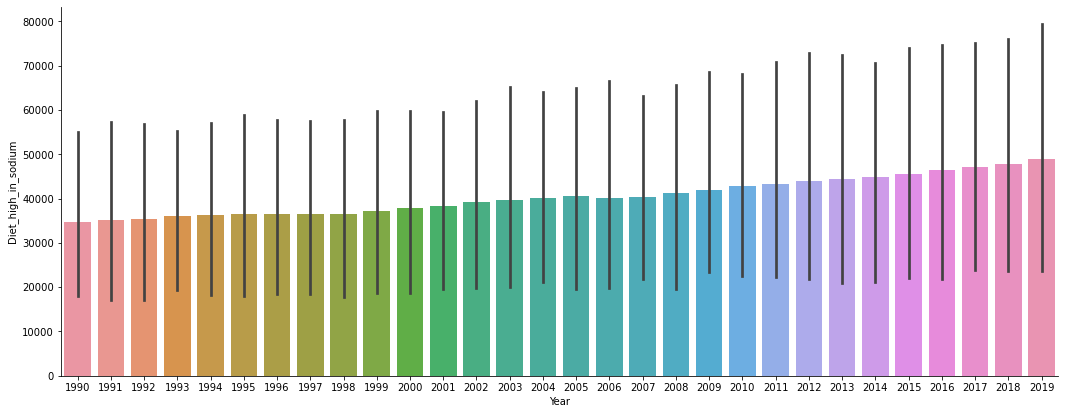

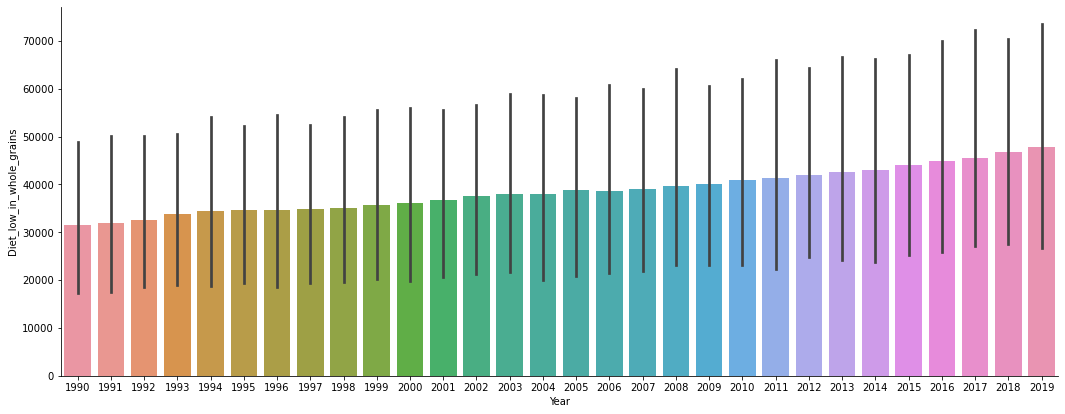

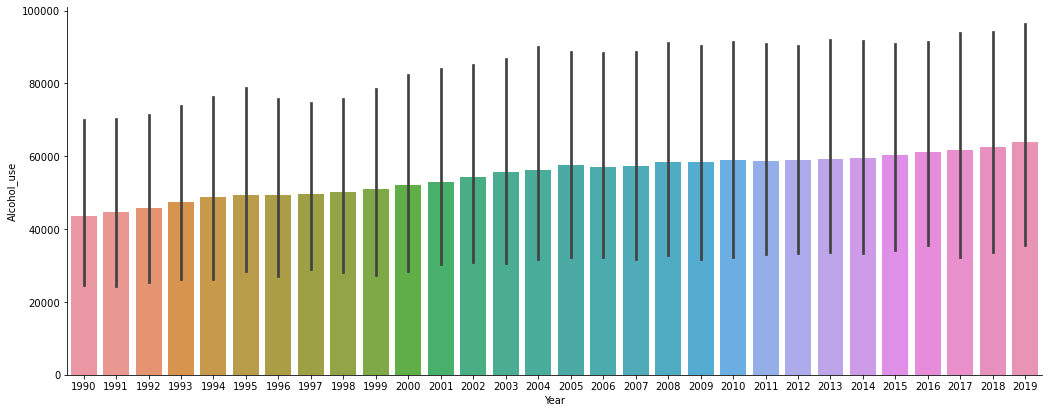

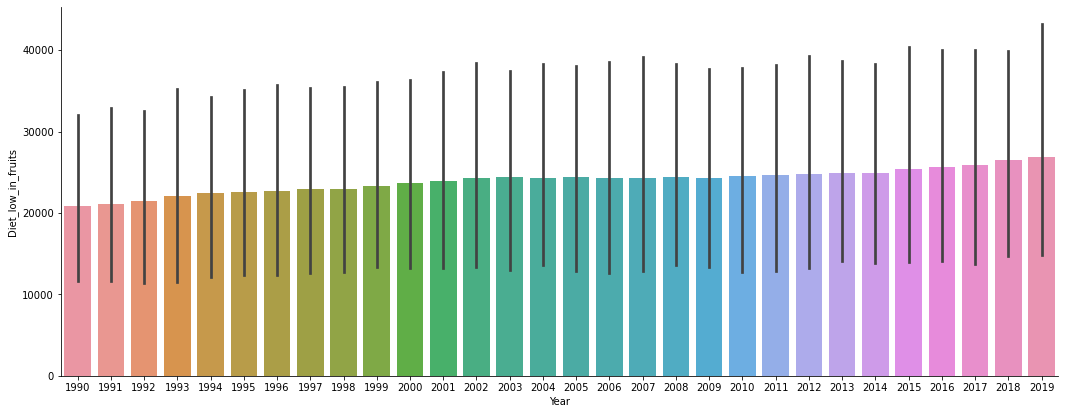

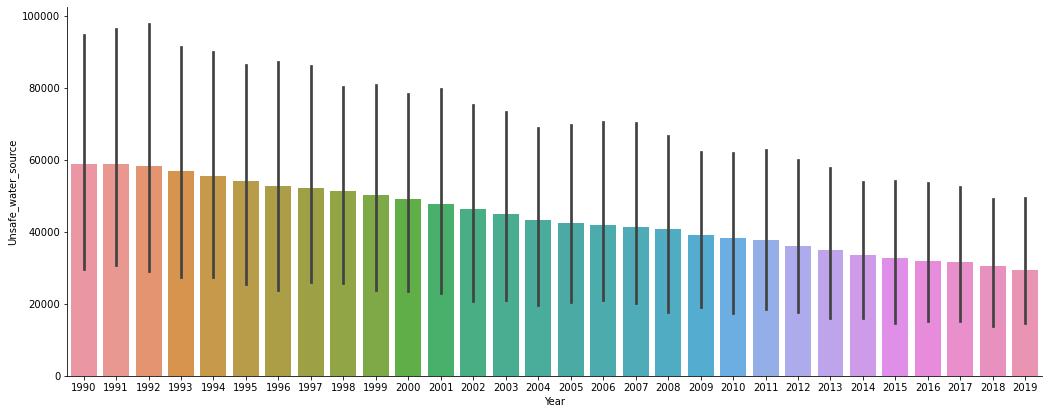

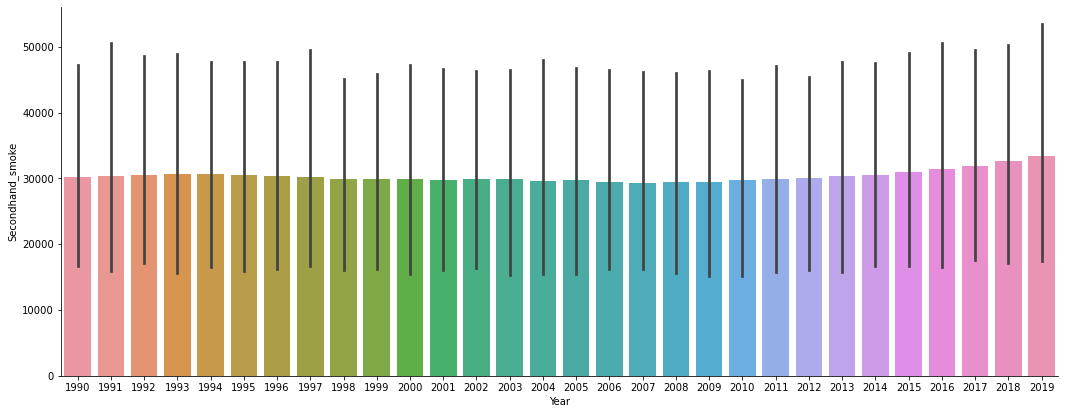

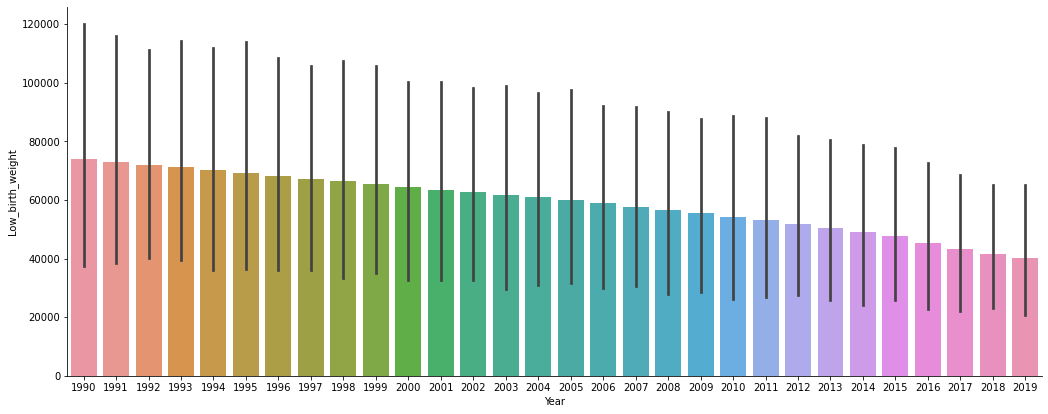

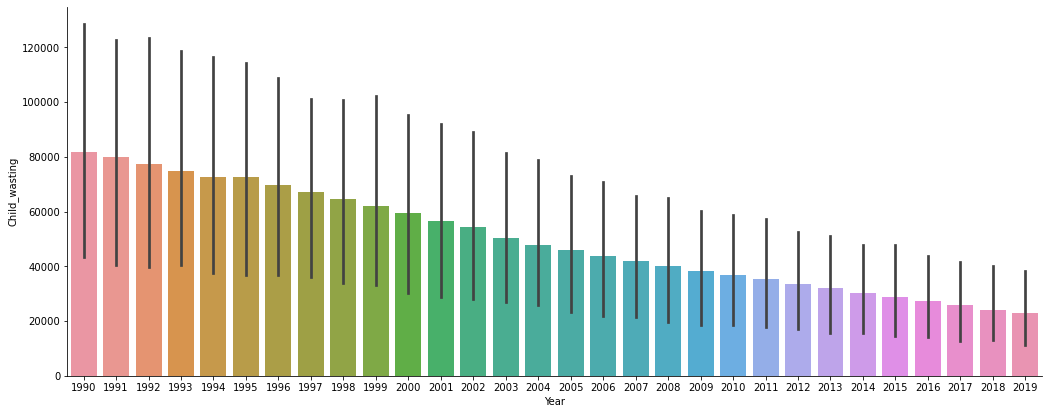

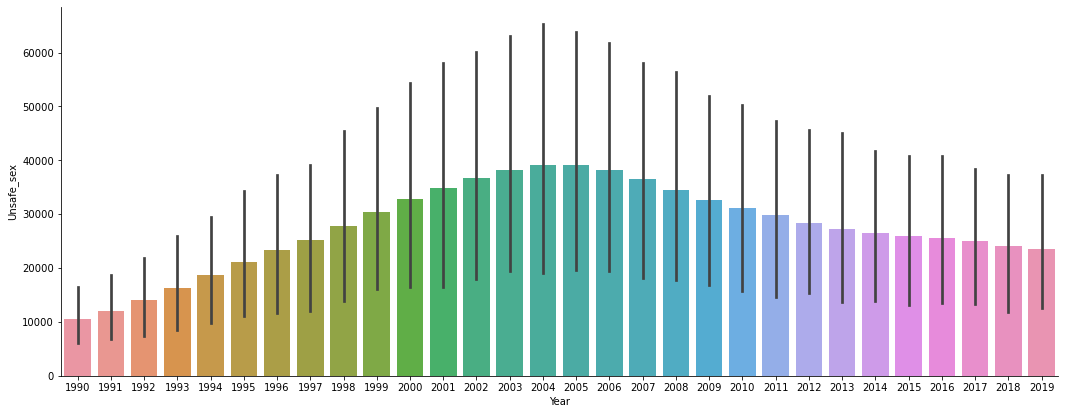

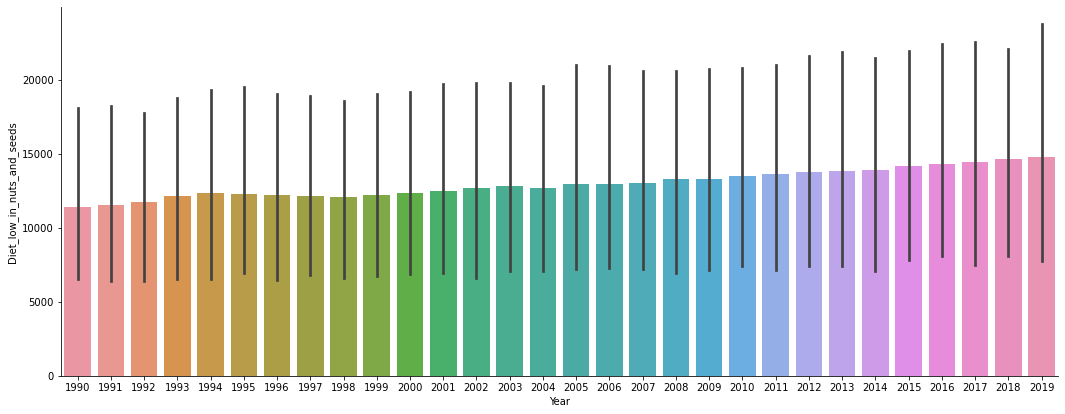

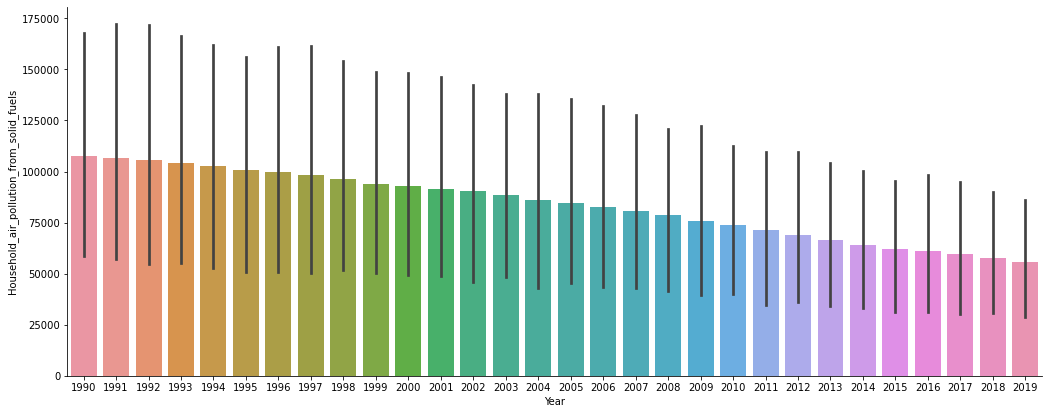

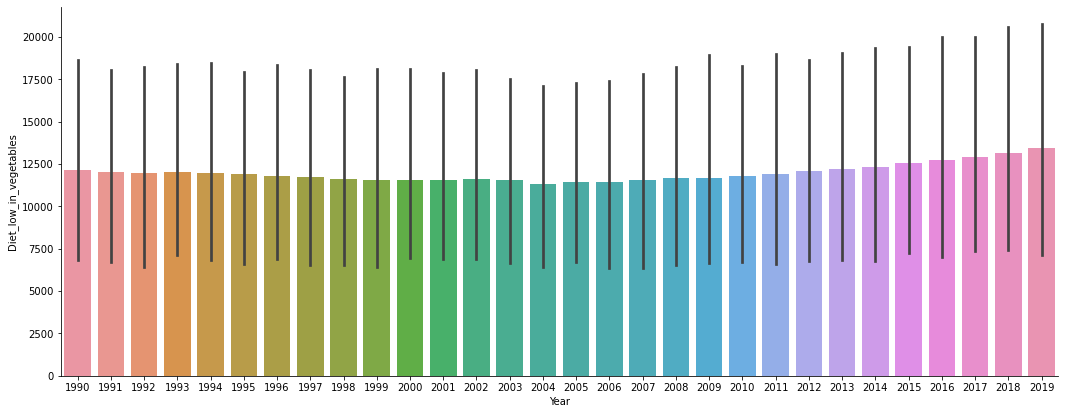

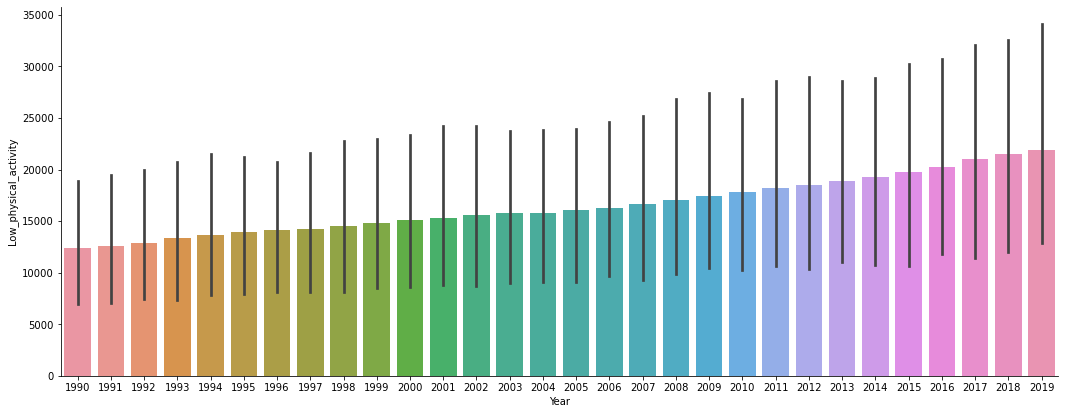

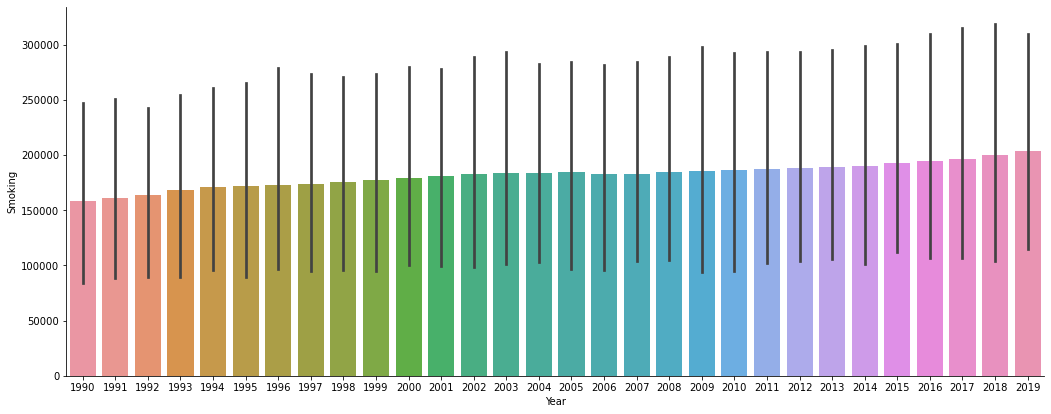

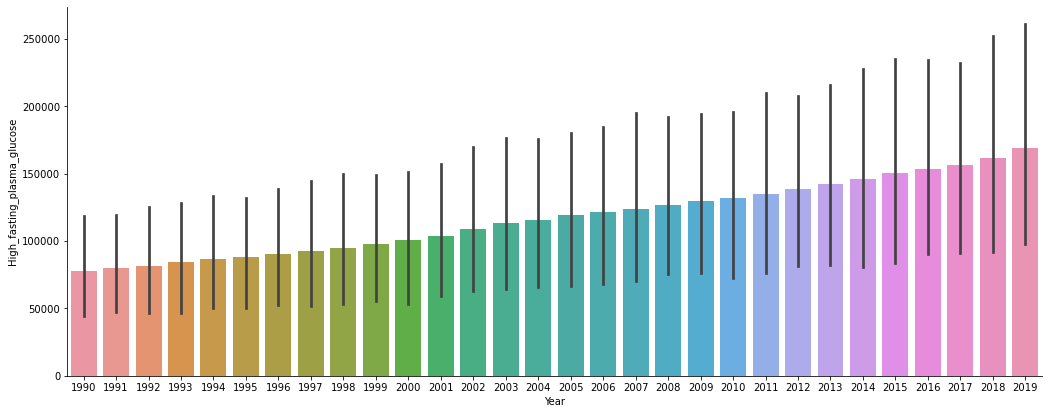

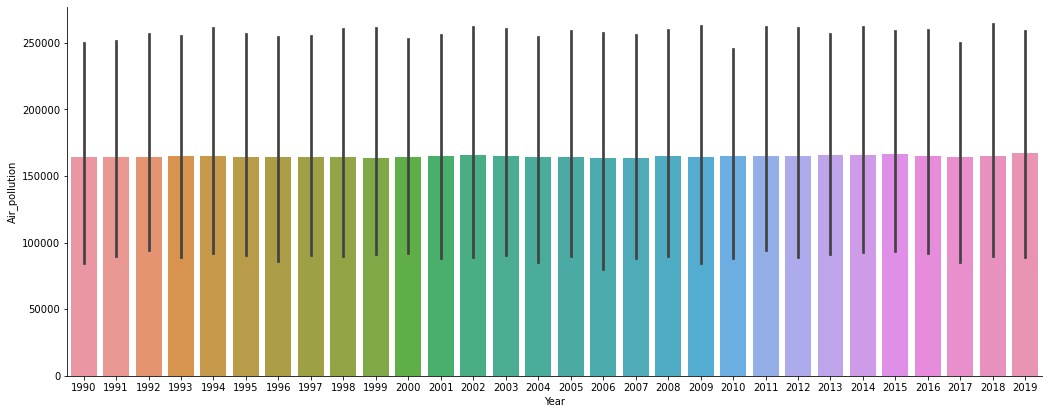

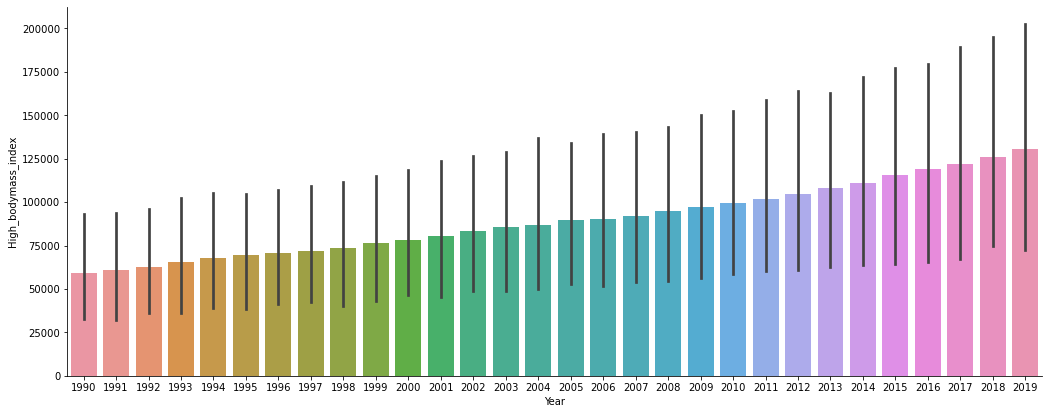

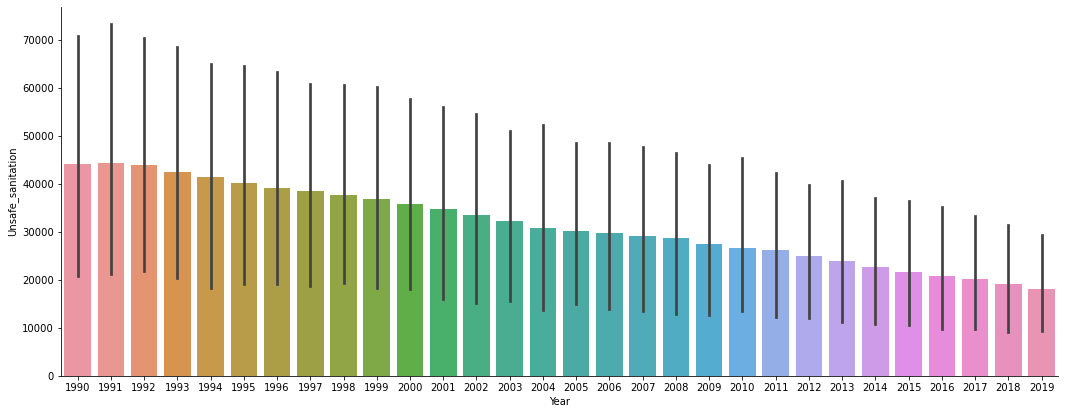

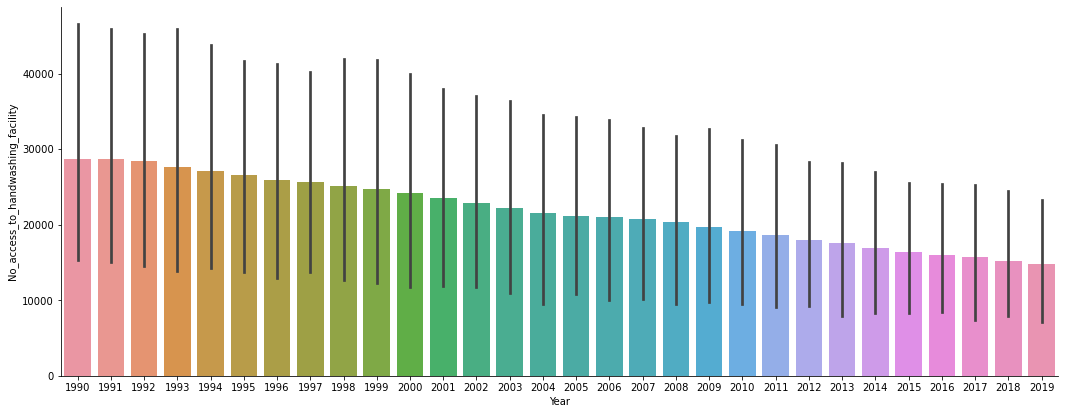

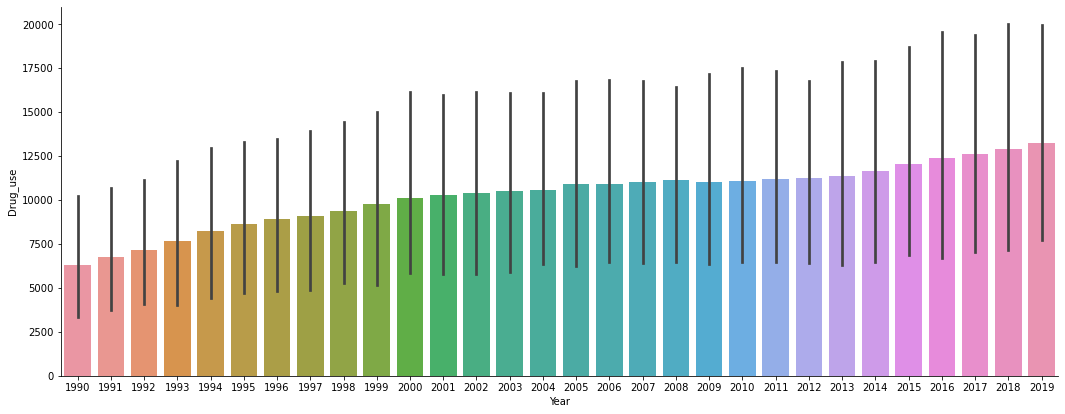

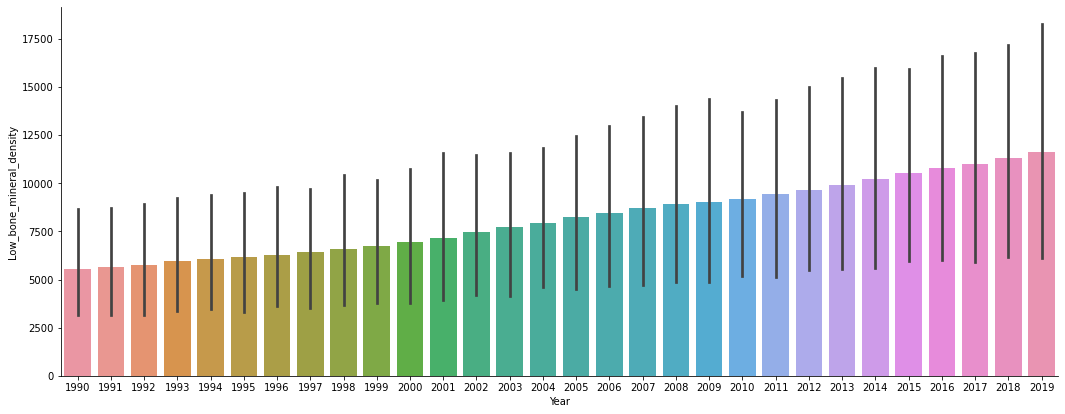

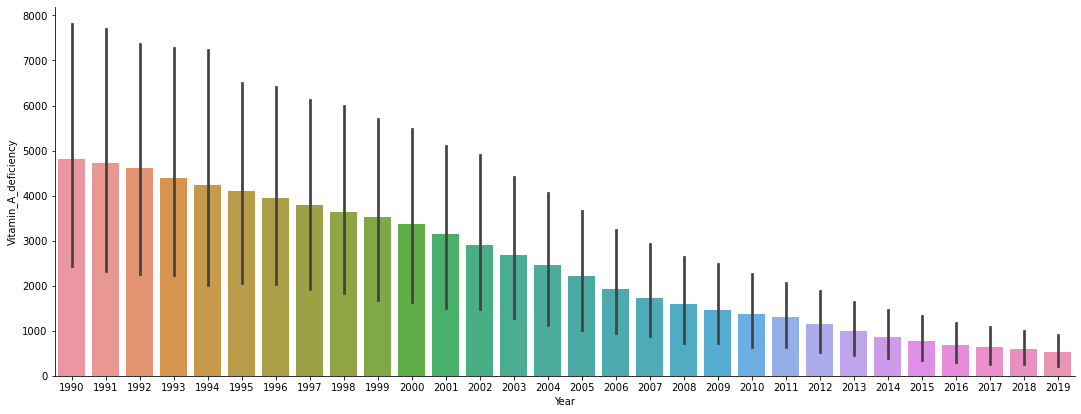

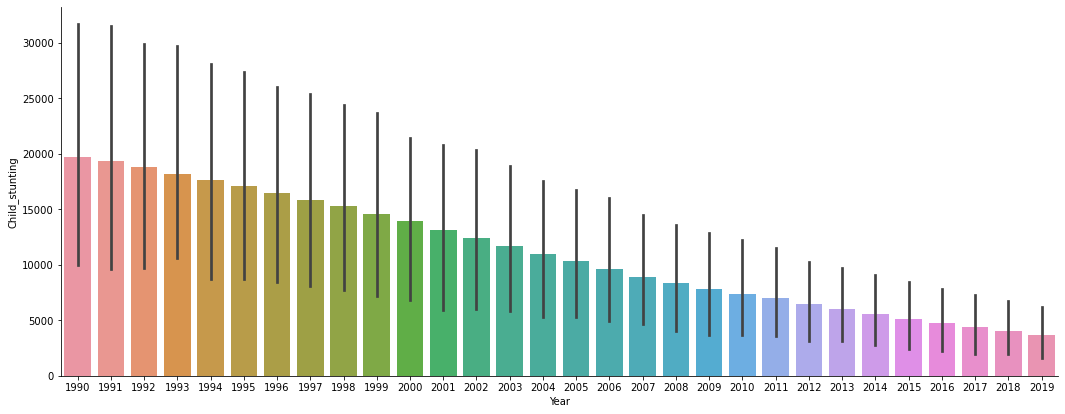

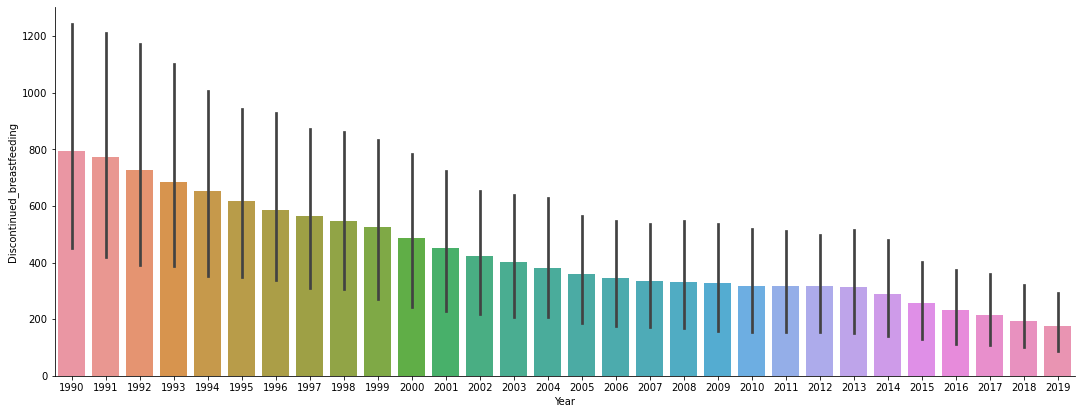

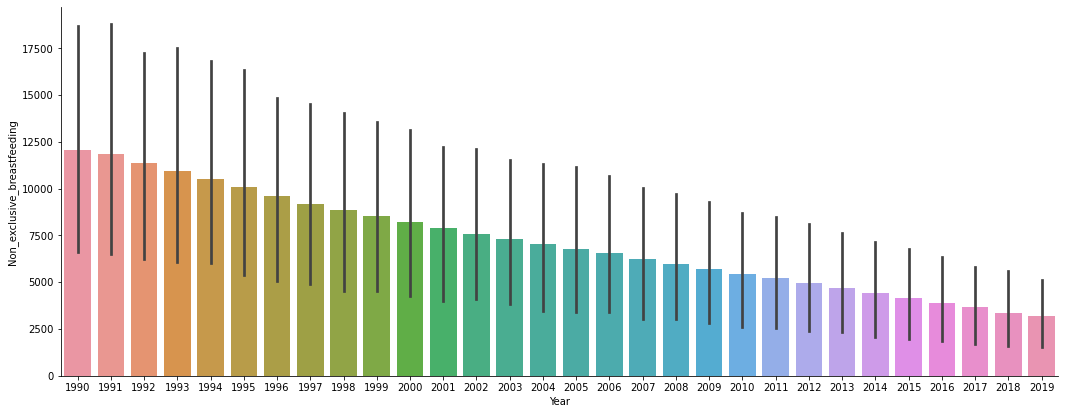

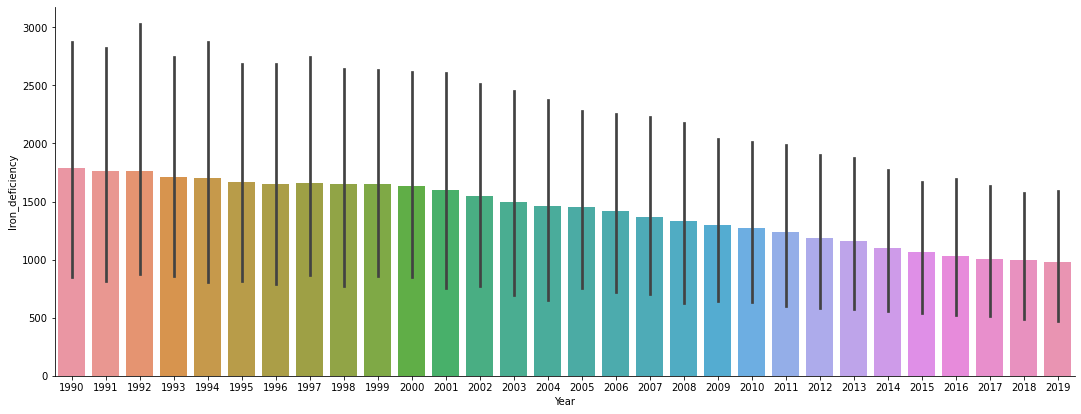

In [21]:
for i in df.columns[3:]:
    sns.catplot(x='Year', y=i, kind='bar',data=df).fig.set_size_inches(18,6)

## Key Takeaways

#### The above plots are plotted to identify the potential varitations in the no. of deaths that has occured due to various factors with the change of time.

 1. The deaths due to <span style='background:#808080'> **`Outdoor Air pollution, High Systolic blood Pressure, Diets high in sodium and low in whole grains, diet low in nuts and seeds, High BMI , Low bone mineral density`**</span> have been increasing steadily from 1990 to 2019 and there seems to be an upward trend in the near future.
 2. Deaths due to <span style='background:#808080'> **`alcohol consumption,second hand smoking and diet low in fruits`**</span>, although increased a bit, there seem to be no trend observed in particular.
 3. It can be inferred that deaths due to <span style='background:#808080'> **`unsafe water sources and Iron deficiency`**</span> have been decreasing gradually which is a positive sign and might continue to do so.
 4. It is observed that the deaths due to<span style='background:#808080'>**`low birth weight,child wasting, Unsafe sanitation, No access to handwash, Non-exclusive breast feeding and Household air pollution from solid fuels`**</span> has been on falling spree which is good sign of development and increase in awareness among people.
 5. Deaths due to <span style='background:#808080'>**`Unsafe sex`**</span> seems to have a rapid spike till 2004 but after these seems to be downward trend which seems to be continued till 2019 which shows that awareness has been increased among people.
 6. It can be seen that deaths due to<span style='background:#808080'>**`Diet low in vegitables`**</span>seemed to reduce gradually till `2004` and then started to raise steadily till now which is appalling.
 7. It is clear from the graph that deaths due to<span style='background:#808080'> **`low physical activity,smoking`**</span> and<span style='background:#808080'>**`high fasting plasma smoking`**</span> are on the rise which is a bad sign of development as it is due to lack of awareness in the society.
 8. As can be seen from the graph, there seem to be no increase or decrease in the deaths caused due to <span style='background:#808080'>**`Air pollution`**</span> from which we can surmise that no effort had been made in controlling the deaths due to air pollution or even controlling the airpollution.
 9. As is illustrated in the plot, it can be concluded that, the deaths due to<span style='background:#808080'>**`Drug use`**</span> had increased steadily in the beginning till 2005 and stagnated a bit till 2012-13 and then started to rise rapidly.
 10. There's been a sharp decrease in the deaths due to the<span style='background:#808080'>**`Vitamin A deficiency, Child stunting and Discontinued breast-feeding`**</span> which is a positive sign of increase in awareness among people.
    
    

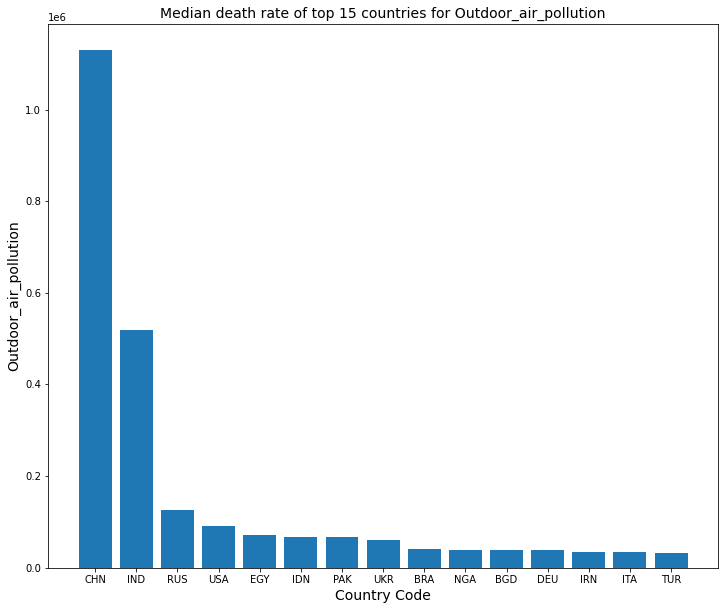

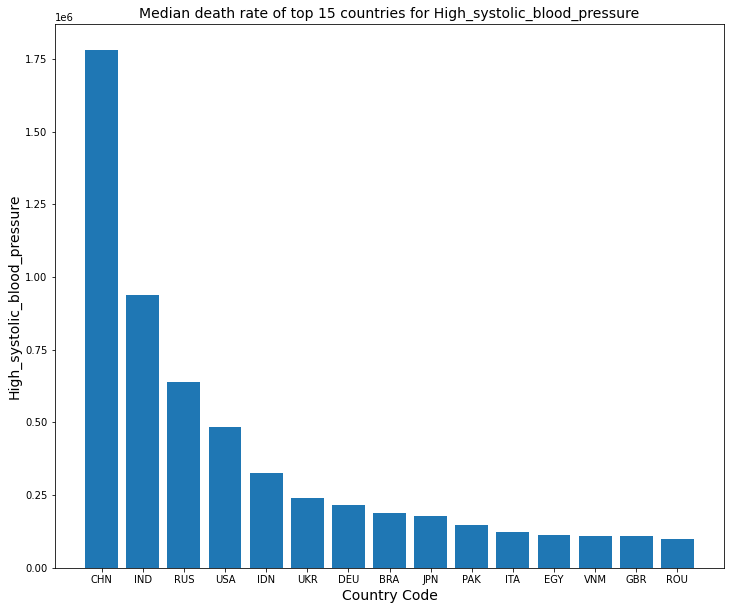

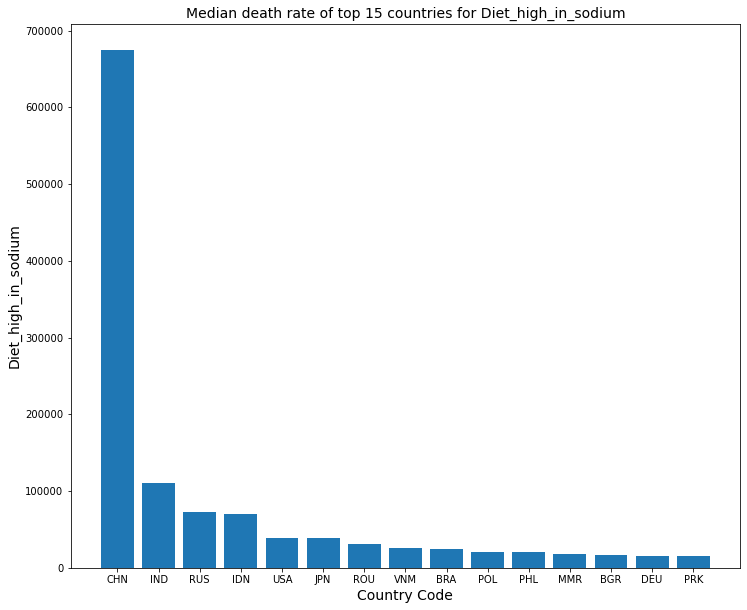

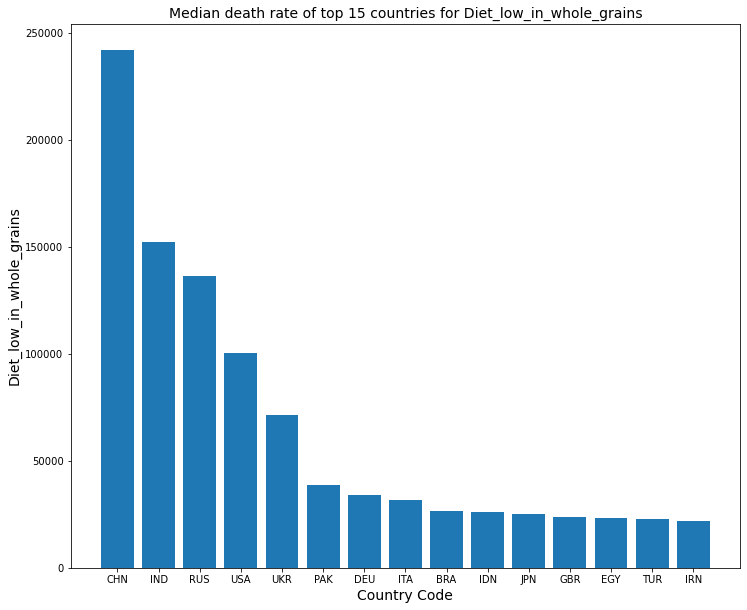

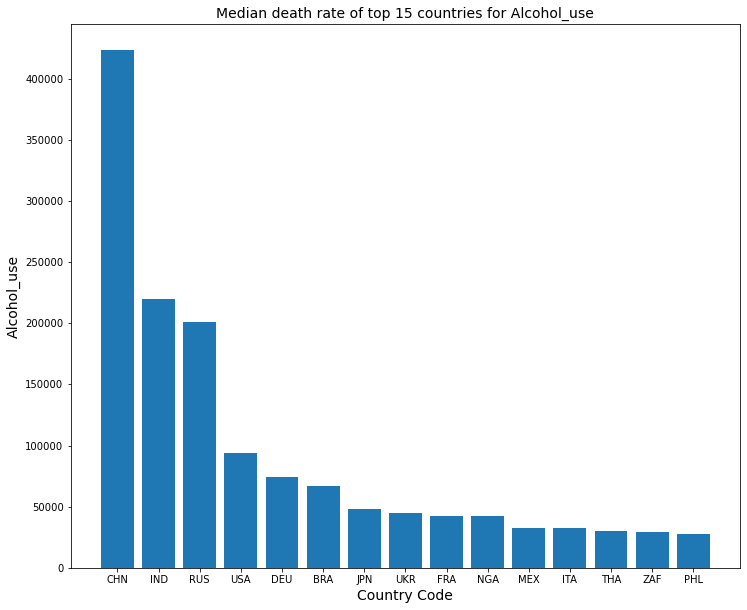

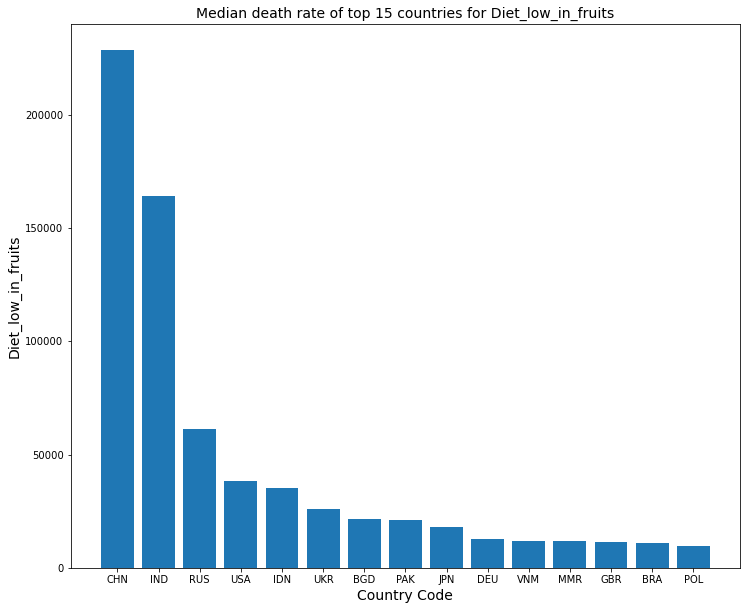

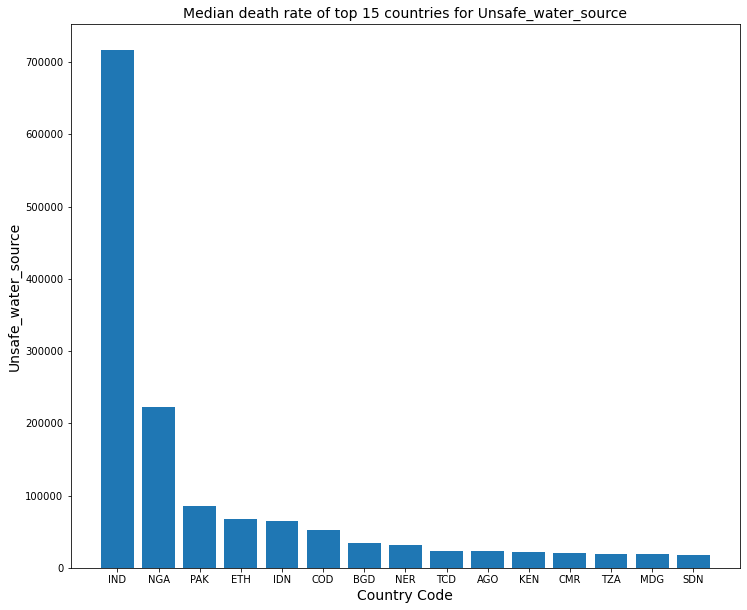

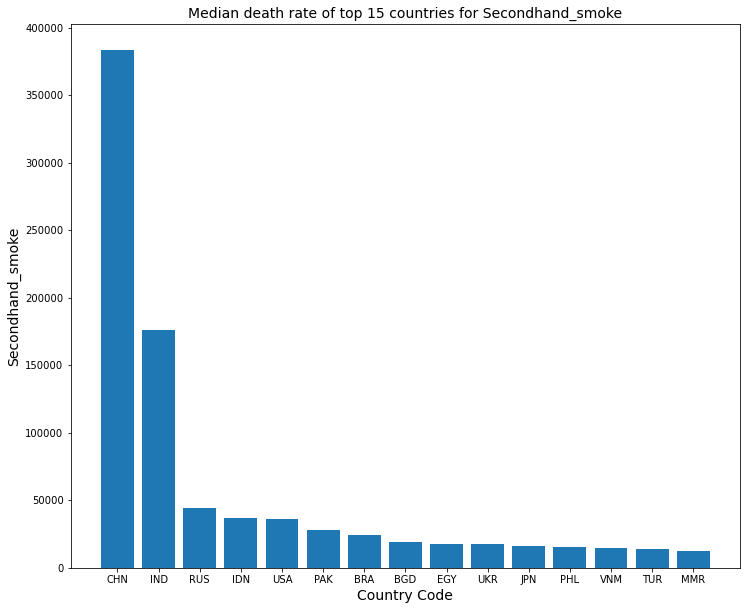

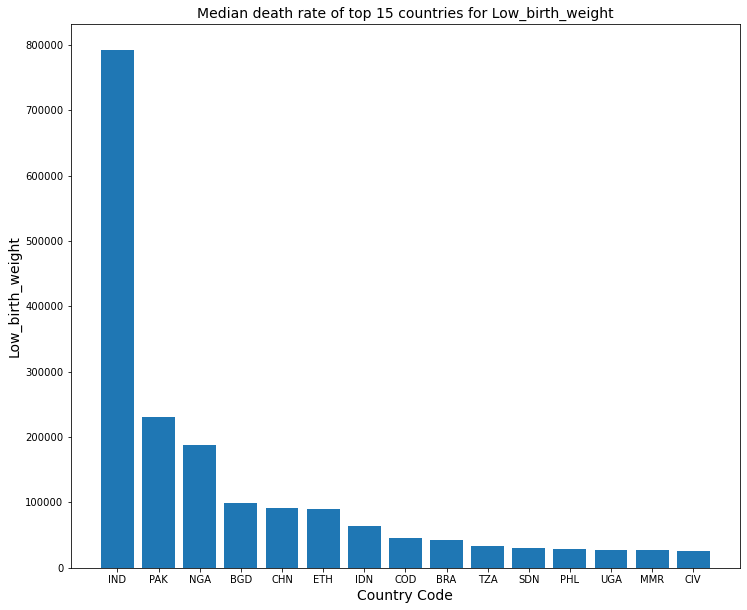

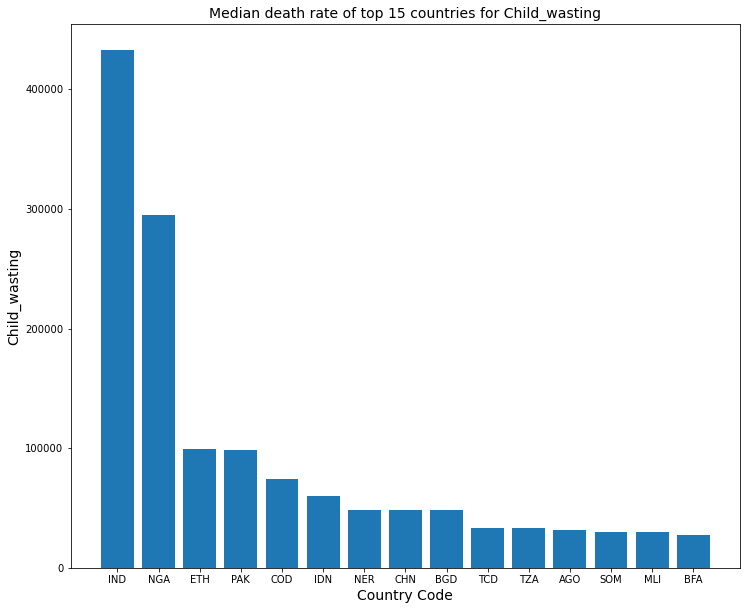

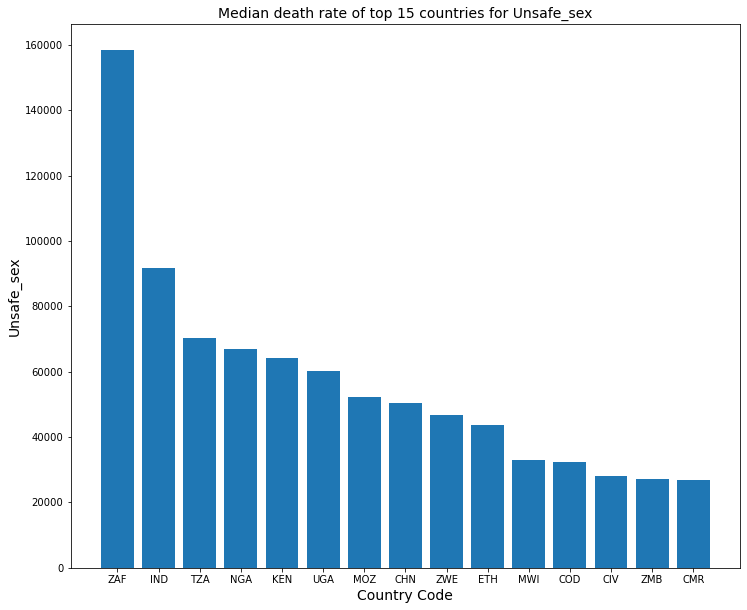

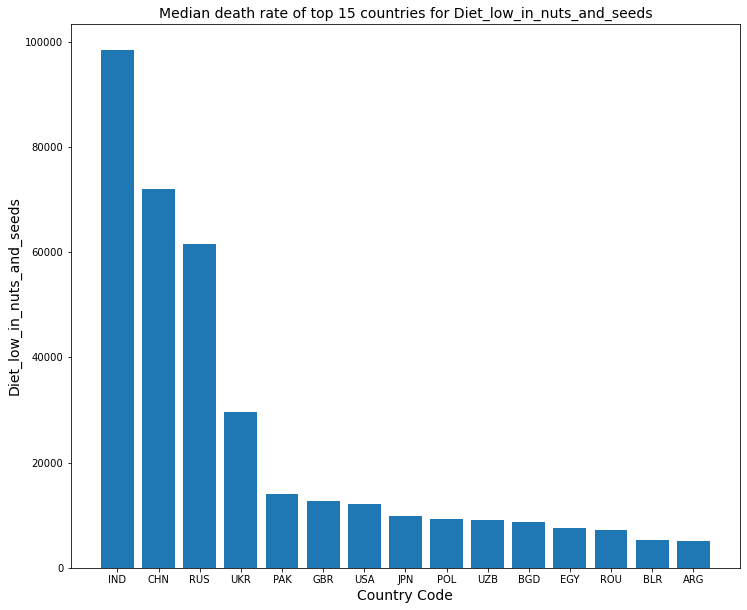

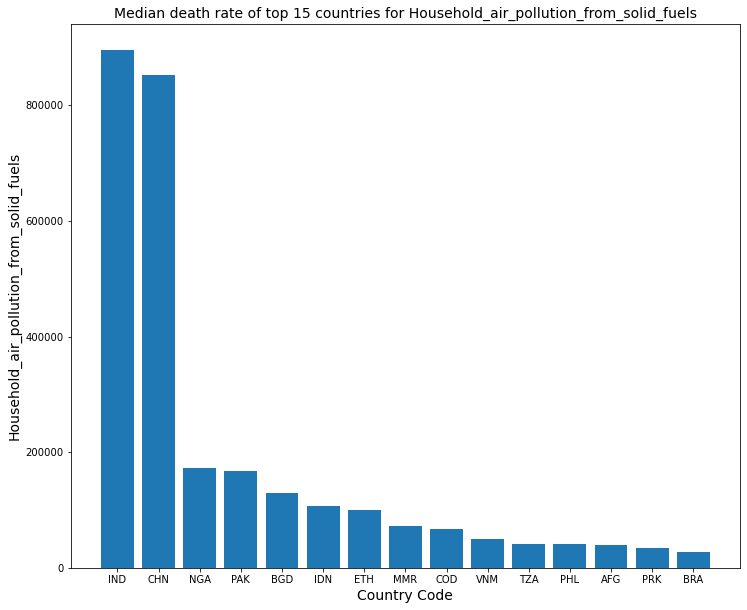

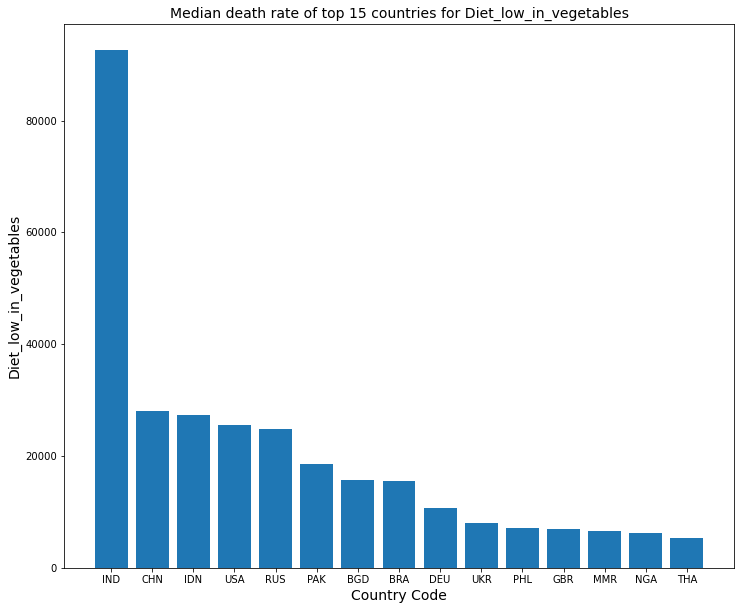

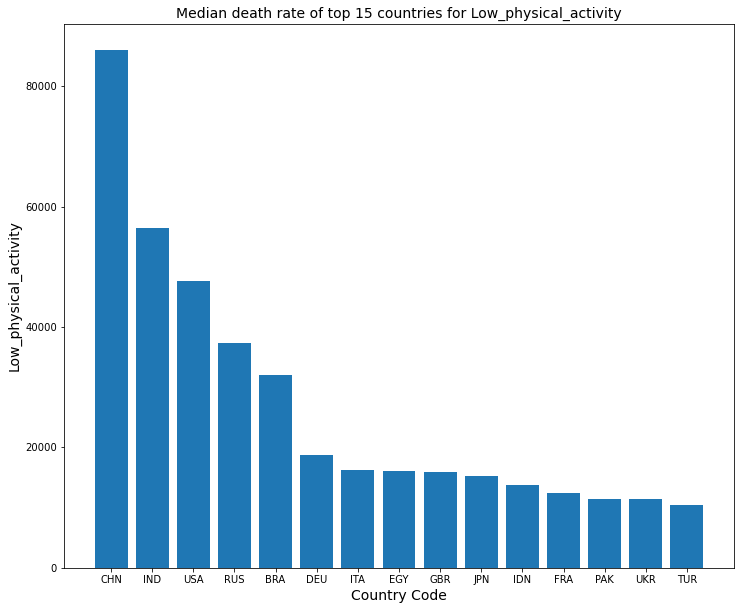

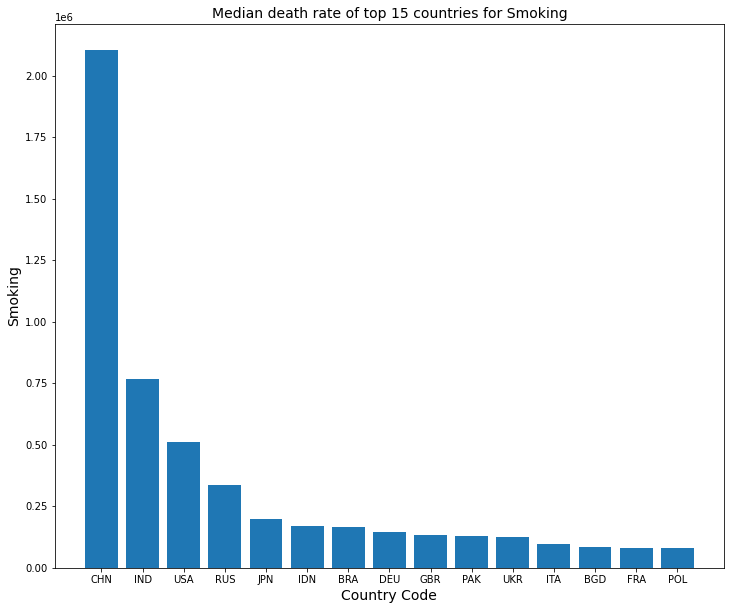

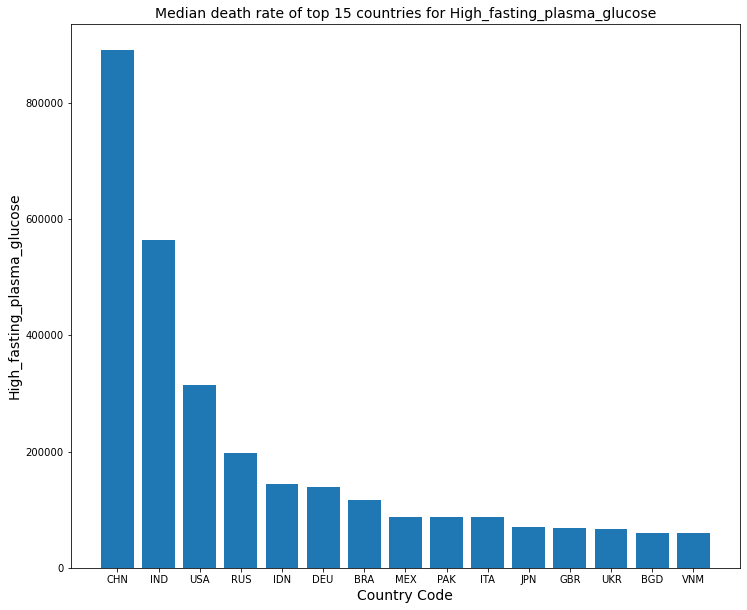

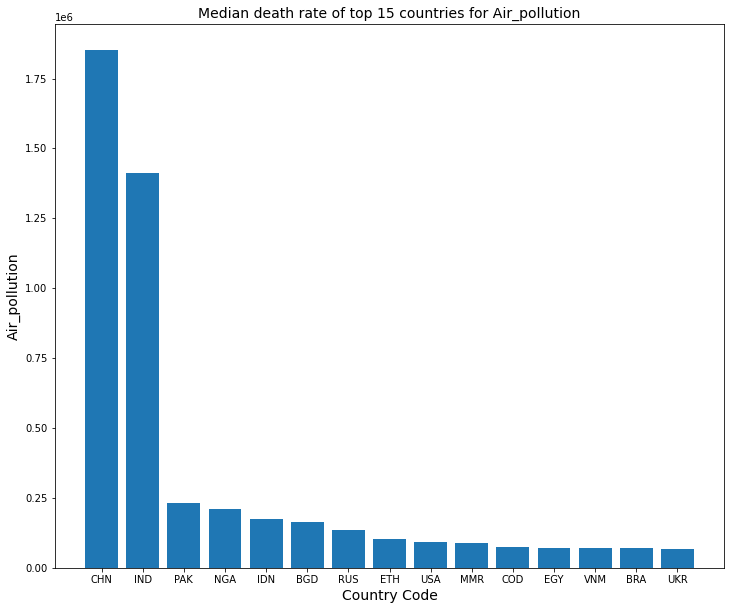

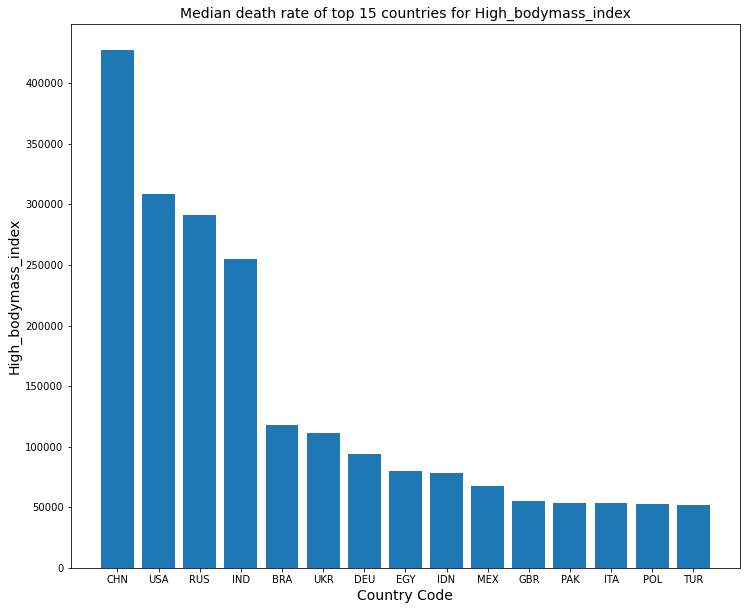

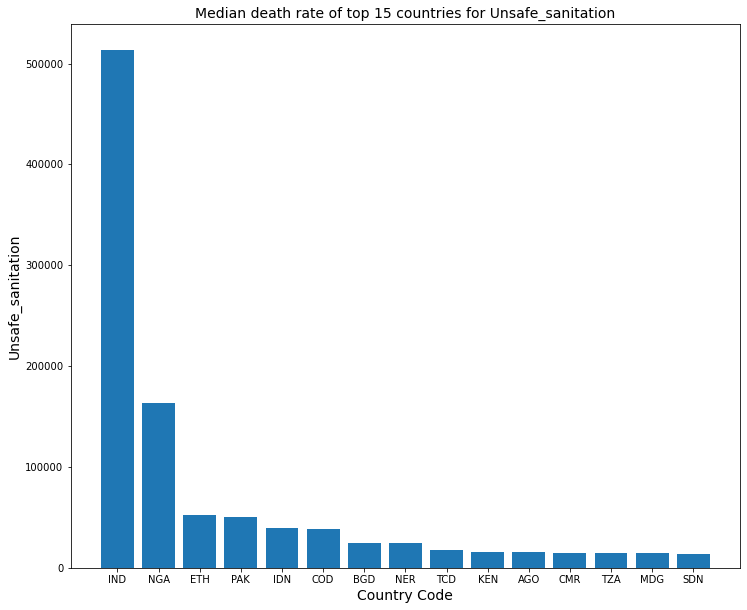

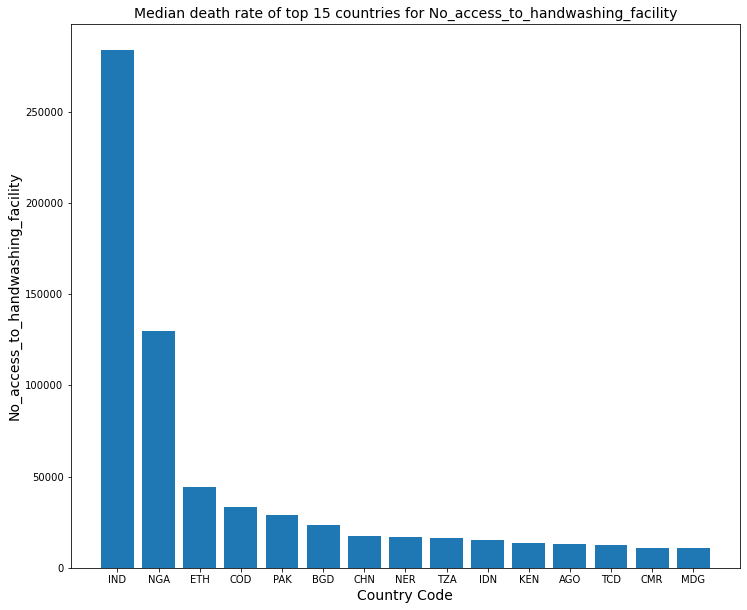

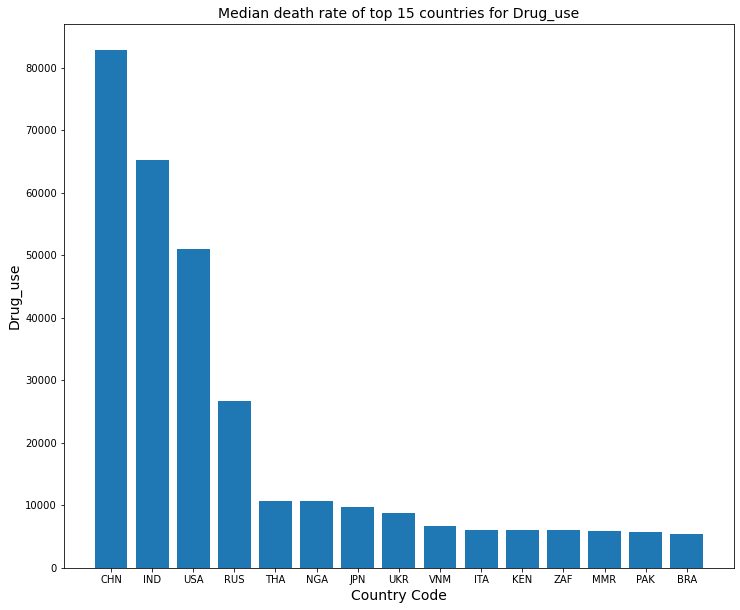

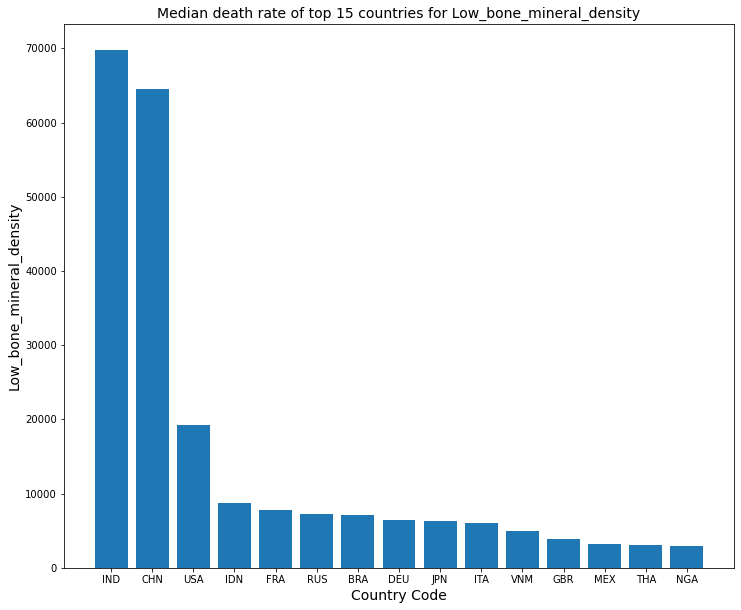

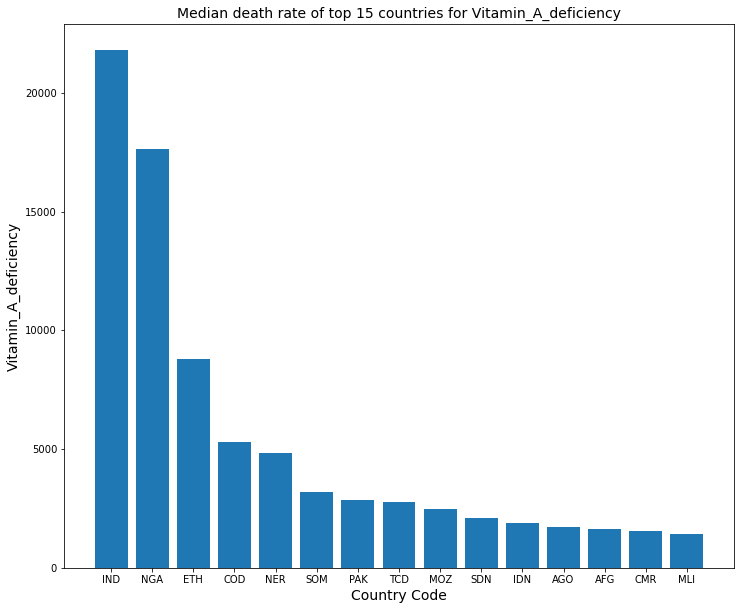

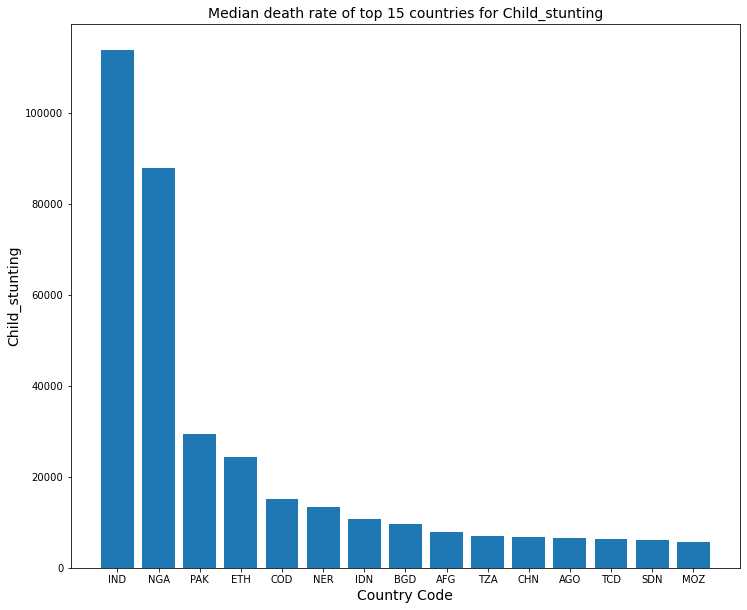

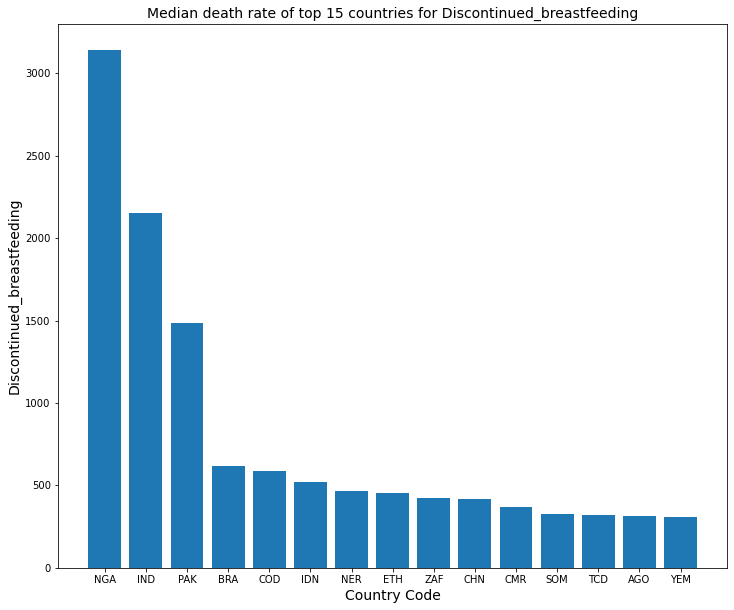

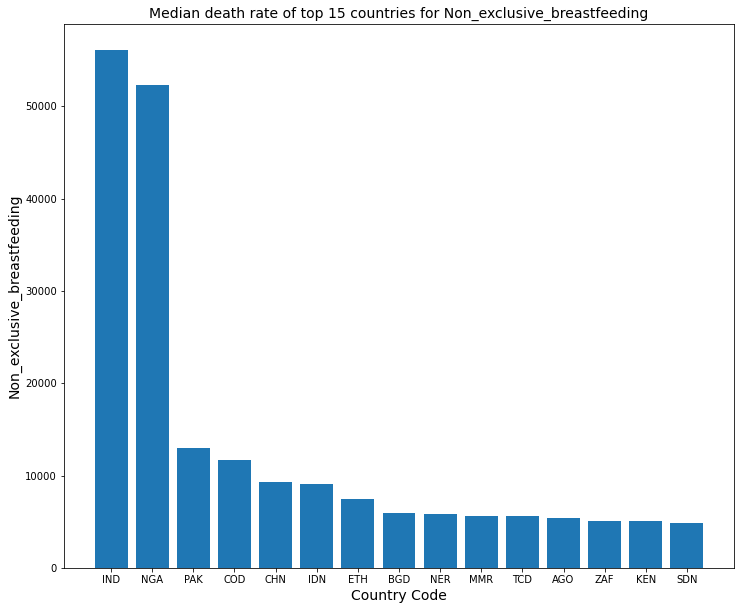

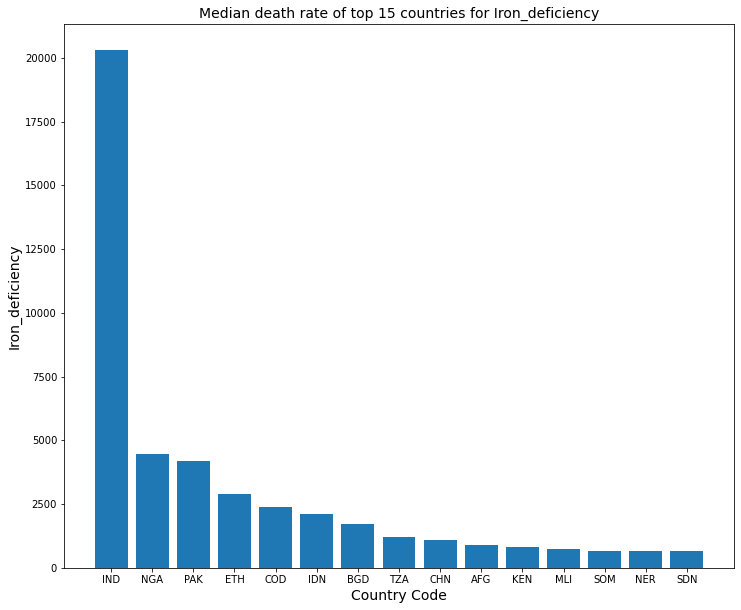

In [137]:
for i in df.columns[3:]:
    a=(df.groupby('Code')['{}'.format(i)].median().sort_values(ascending=False).head(16))
    plt.figure(figsize=(12,10))
    plt.bar(a.index[1:], a.values[1:])
    plt.title('Median death rate of top 15 countries for {}'.format(i),fontsize=14)
    plt.xlabel('Country Code',fontsize=14)
    plt.ylabel('{}'.format(i),fontsize=14)
    plt.show()

#####  From the plots plotted in the above section, we can summarize that, `India` and `China` `tops`  the list in maximum number of deaths by each segment closely `followed by` `Pakistan`, `Ethipoia` and `Nigeria`

<AxesSubplot:>

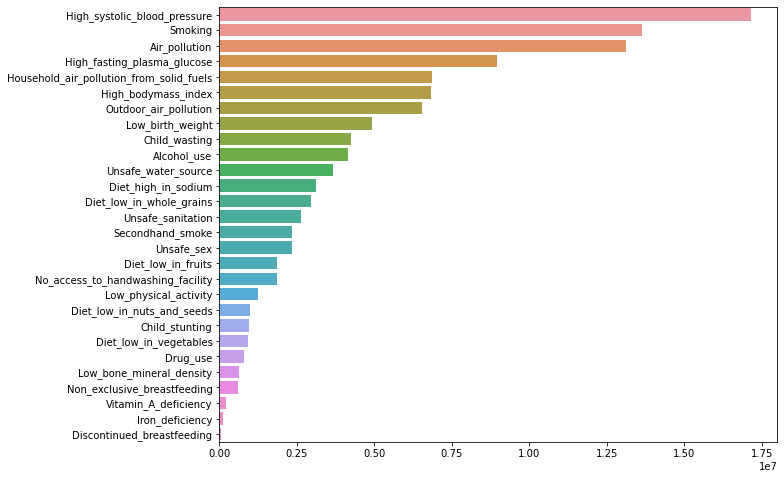

In [140]:
death_mean = df.groupby('Code').mean().drop('Year', axis=1).sum().transpose().sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(y=death_mean.index, x=death_median.values, orient='h')

The above plot is plotted to see the segmentwise deaths across the entire timespan for all the countries in the dataset. It is  clear that the median deaths due to the <span style='background:#808080'>**`High systolic blood pressure`**</span> is very high followed by <span style='background:#808080'>**`smoking`**</span> and deaths due to <span style='background:#808080'>**`Air pollution`**</span>. As inferred from the previous plots, we can observe that  among the top contributors, <span style='background:#808080'>**`deaths due unhealthy lifestyle`**</span> is  around <span style='background:#808080'>**`50%`**</span> 

### In the following pairplots, due to numerous numeric segments, The segments have been categorized based on its type as <span><h3>**`Malnutrition`, `Hygeine and Pollution factors`,`Unhealthy lifestyle`**</h3></span> and the plot has been plotted to see if any inherent relationship can be drawn from them. 

In [164]:
df1=df[['Diet_high_in_sodium', 'Diet_low_in_whole_grains', 'Diet_low_in_nuts_and_seeds', 'Diet_low_in_fruits', 
          'Diet_low_in_vegetables']]

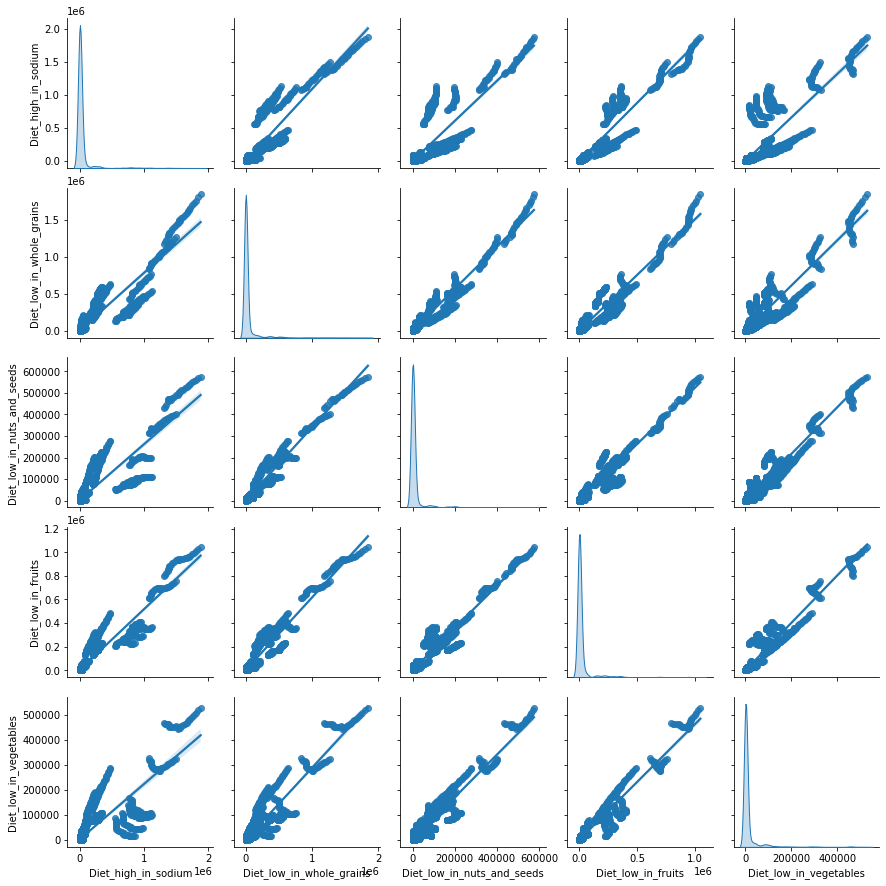

In [167]:
sns.pairplot(data=df1, kind='reg', diag_kind='kde')

##### As seen from the plot, we can infer that, the deaths due to malnutrition have an approximate relationship as similar patterns are being observed. 

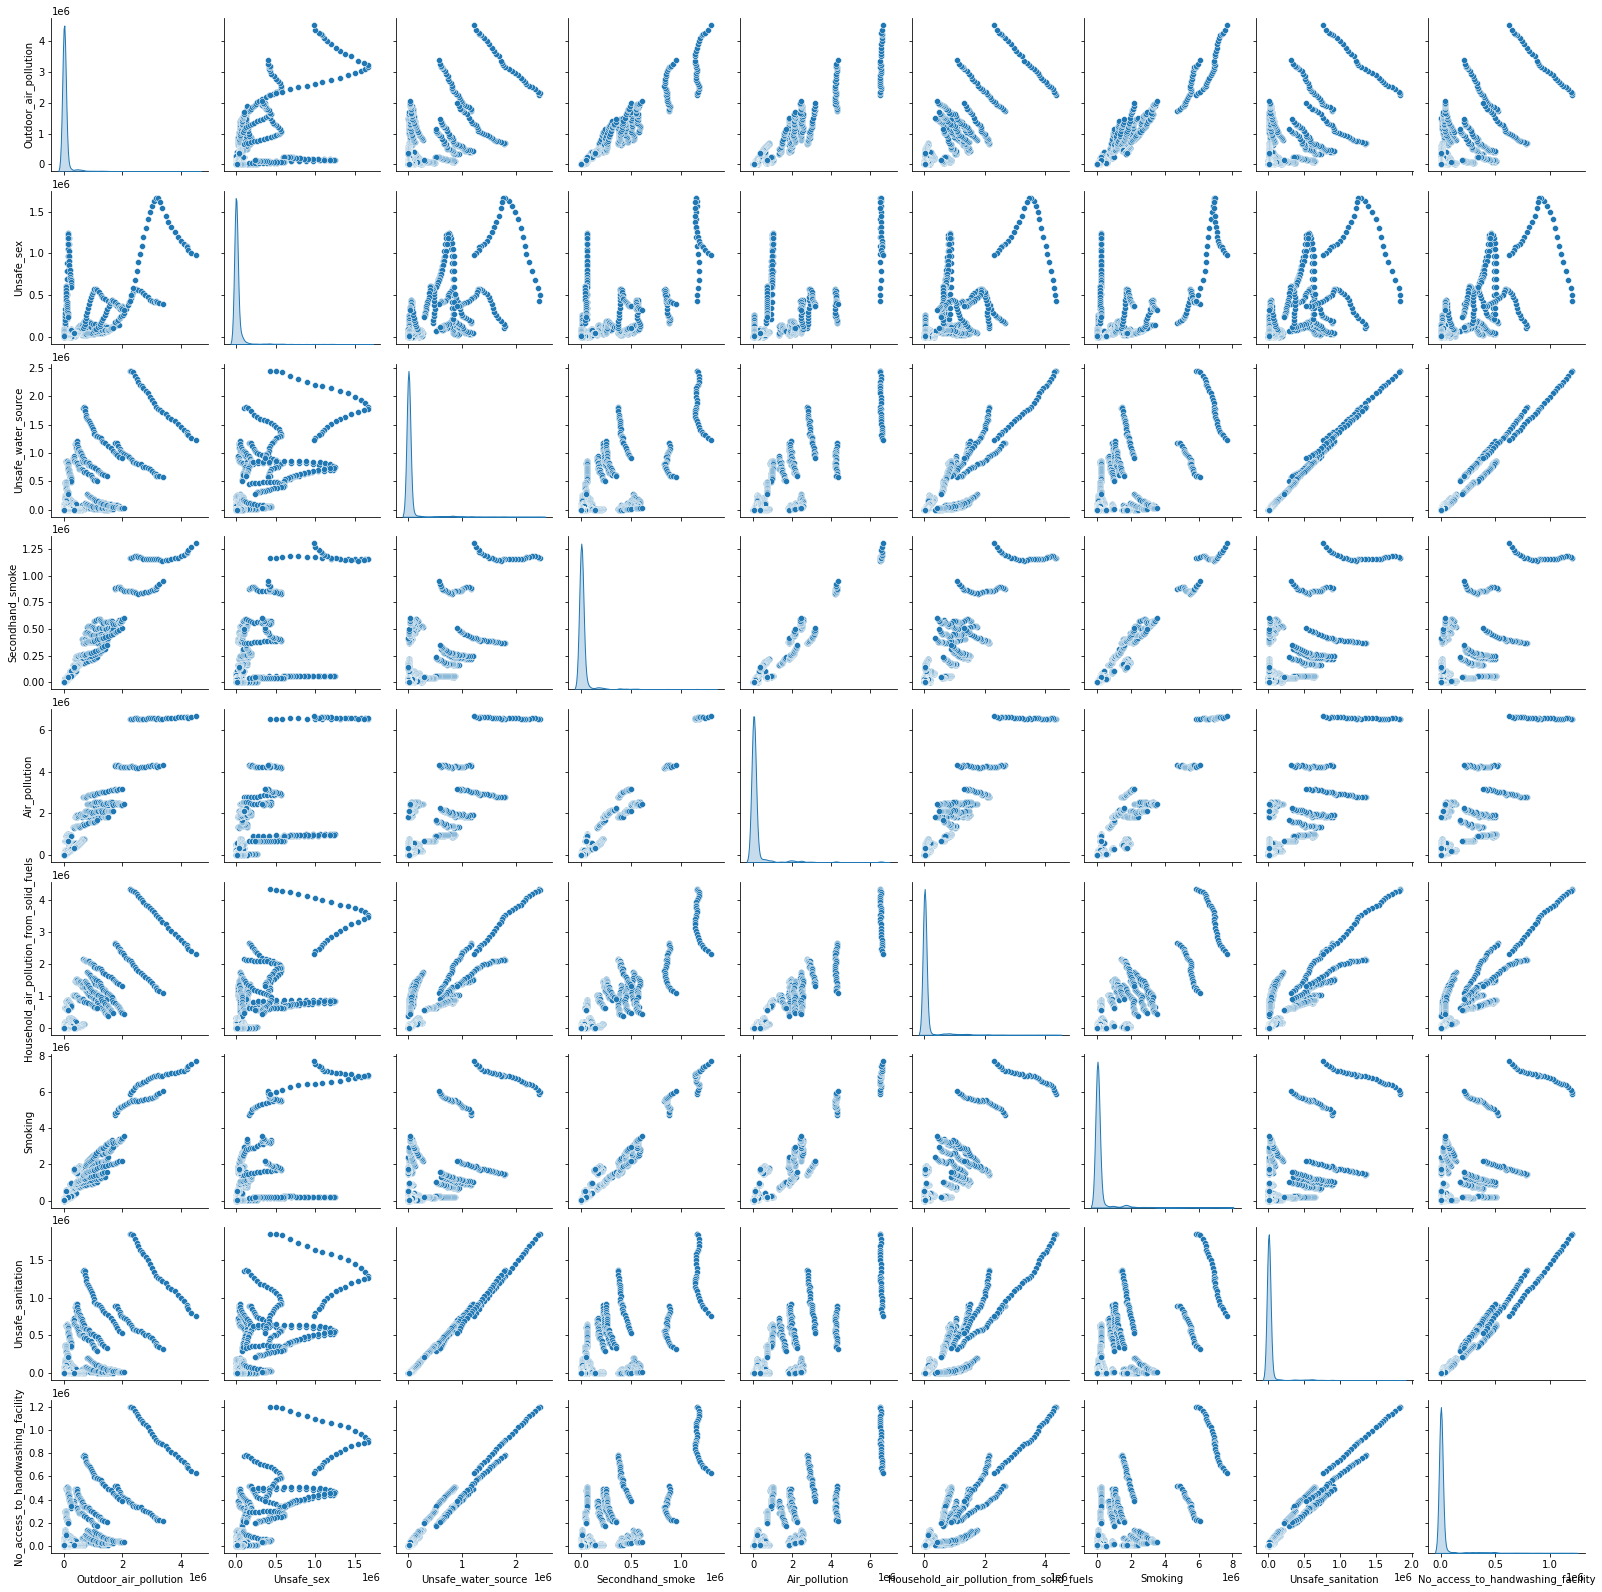

In [176]:
sns.pairplot(data=df[['Outdoor_air_pollution','Unsafe_sex','Unsafe_water_source', 'Secondhand_smoke','Air_pollution','Household_air_pollution_from_solid_fuels','Smoking','Unsafe_sanitation',
       'No_access_to_handwashing_facility']], kind='scatter', diag_kind='kde')

##### Unlike the deaths due to Mal-nutrition, there's no apparent relation ship between deaths caused to pollution or due to pollutants such as second hand smoking.
##### But it is to be noted that, The deaths due to hygiene factors like `Unsafe saniation`  and `No access to handwash` seems to have a close relationship as the graph trend is approximately `Linear`.

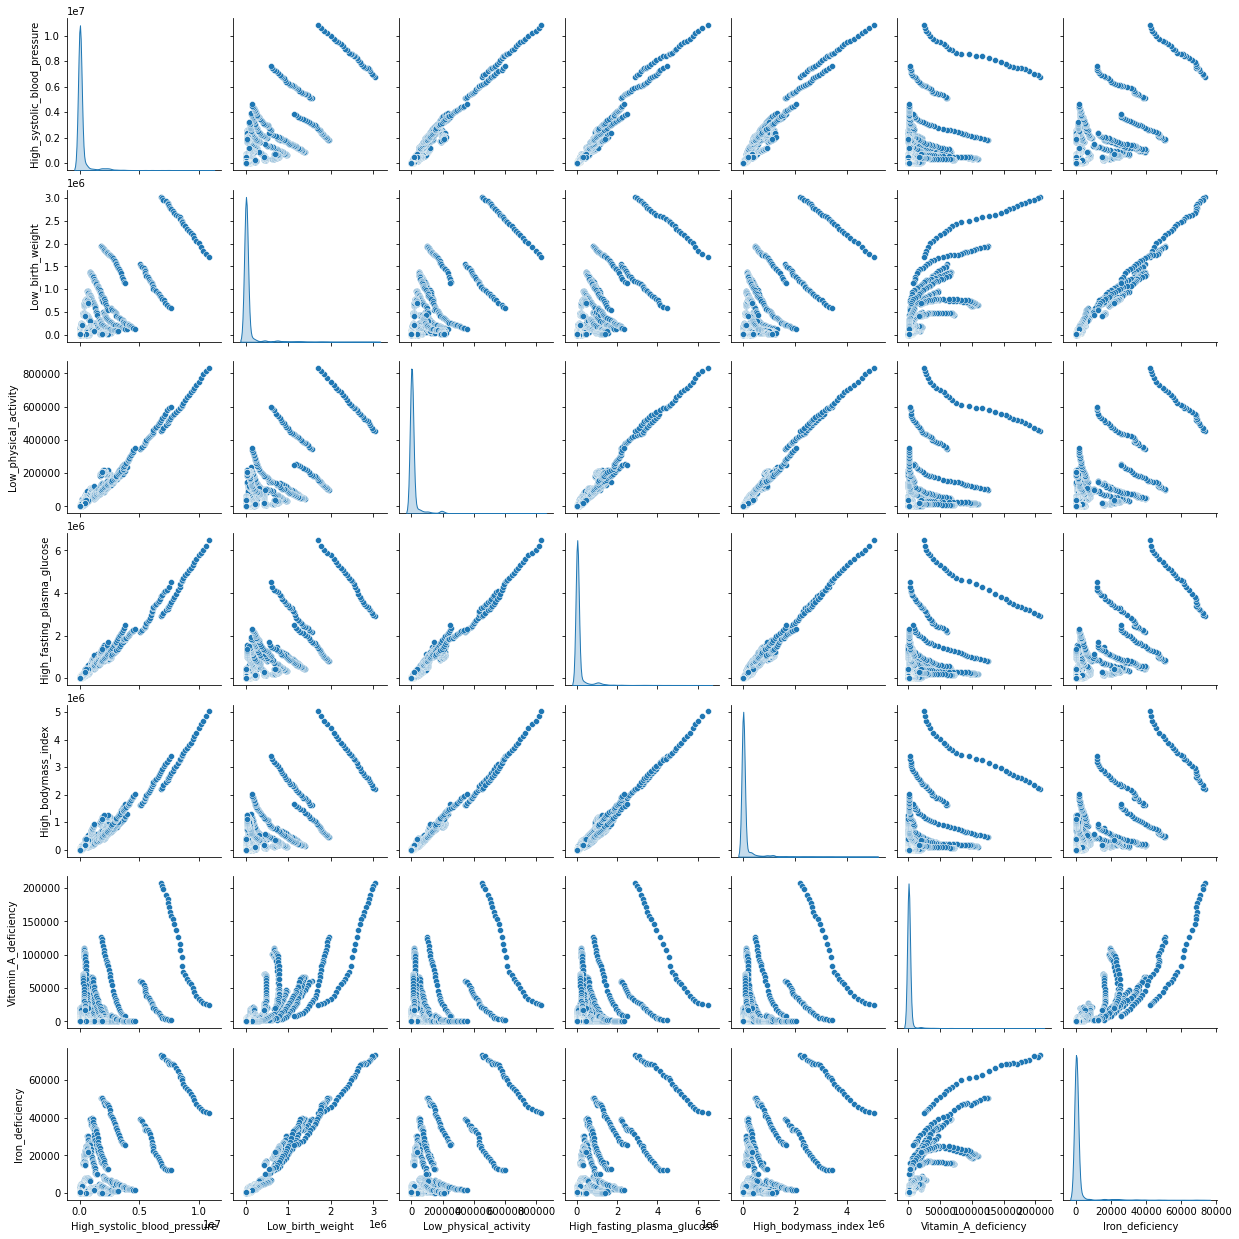

In [179]:
sns.pairplot(data=df[['High_systolic_blood_pressure','Low_birth_weight','Low_physical_activity','High_fasting_plasma_glucose',
                        'High_bodymass_index','Vitamin_A_deficiency','Iron_deficiency']], kind='scatter', diag_kind='kde')

As see in the plot, we can deduce that, deaths due to health issues are related. If we look at the graphs of <span style='background:#808080'>**`High fasting glucoze`**</span> with respect to <span style='background:#808080'>**`BMI`**</span>, <span style='background:#808080'>**`Physical activity`**</span>  and <span style='background:#808080'>**`Systolic blood pressure`**</span>, the graph trends to be linear which clearly shows the relation. We can pressume that <span style='background:#808080'>**`Iron deficiency`**</span> is associated with <span style='background:#808080'>**`low birth weight`**</span> as they seem to be correlated.

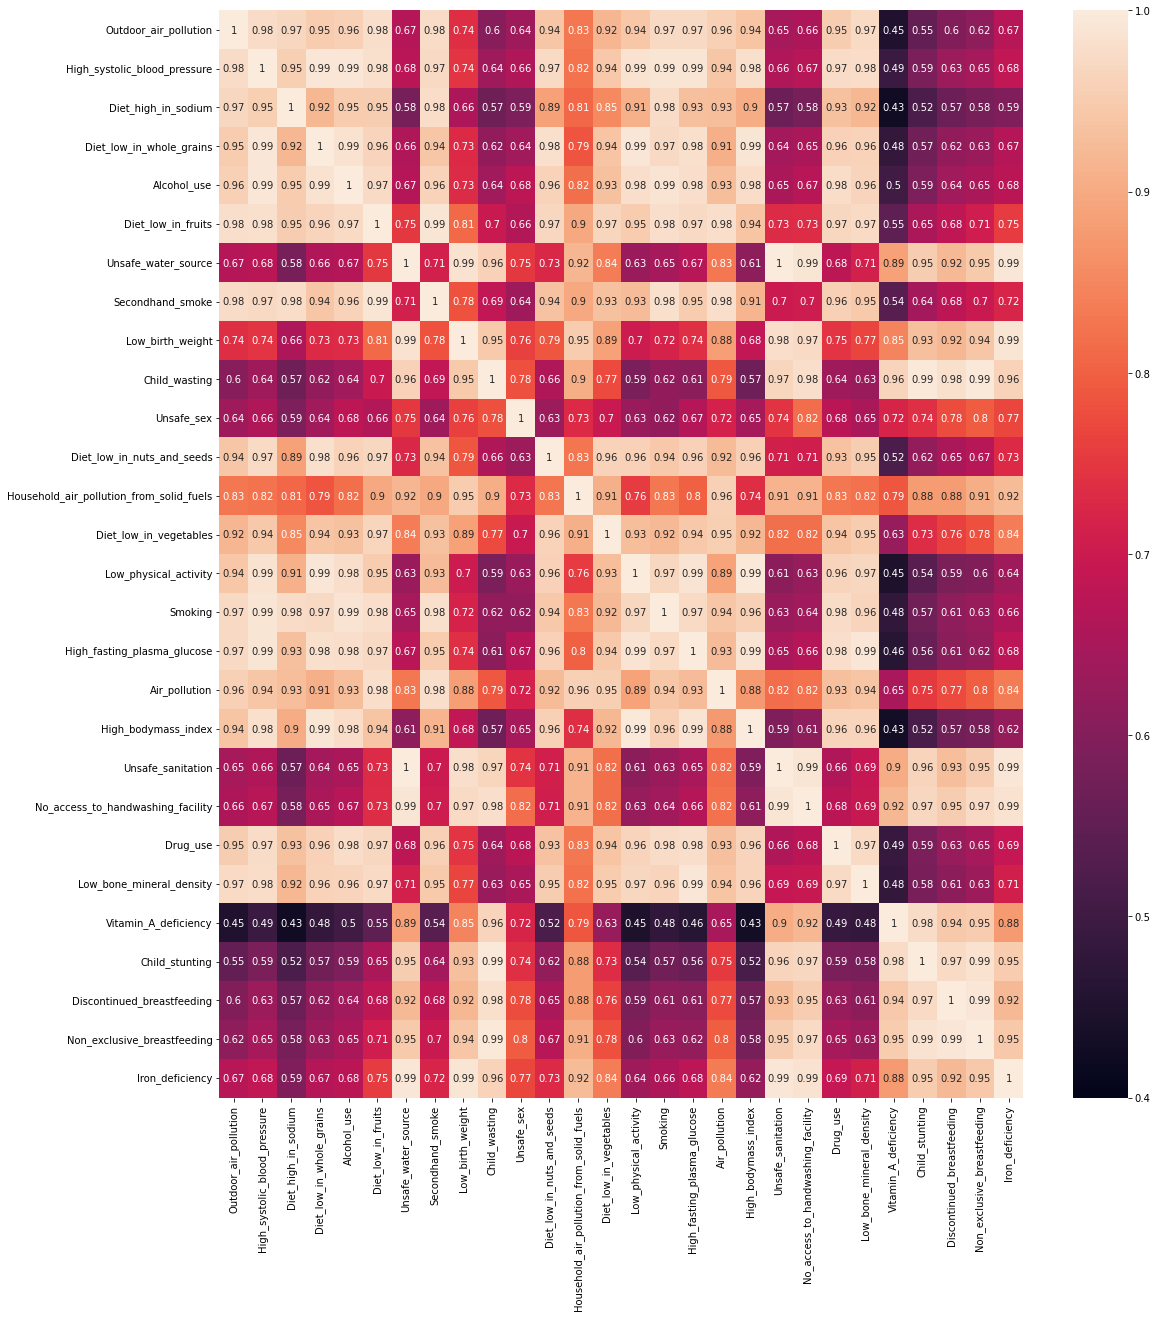

In [44]:
plt.figure(figsize=(18,20))
sns.heatmap(df.drop('Year', axis=1).corr(), annot=True, vmin=0.4, vmax=1)
plt.show()

##### As is illustrated by the plot, it can be conjunctured that there is a very high correlation between <i>**`pollution, mal-nutrition and Unhygenic conditions`**</i>  specified in the dataset.

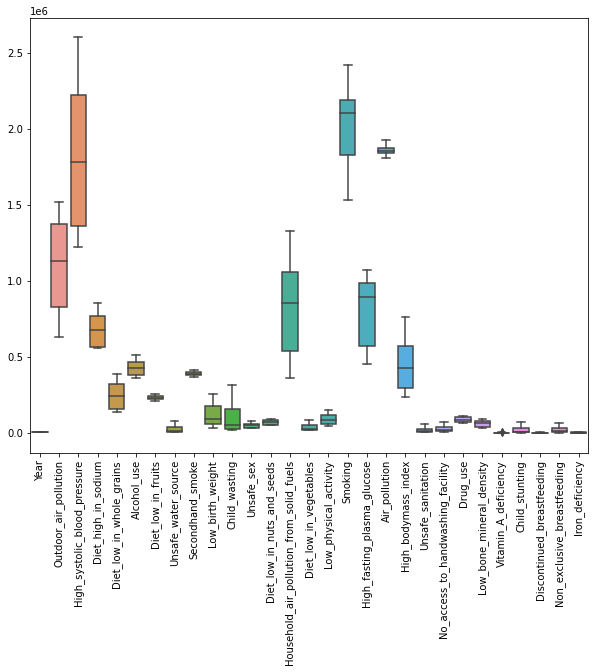

In [213]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[df.Entity=='China'])
plt.xticks(rotation=90)
plt.show()   # Boxplot across various segments for China

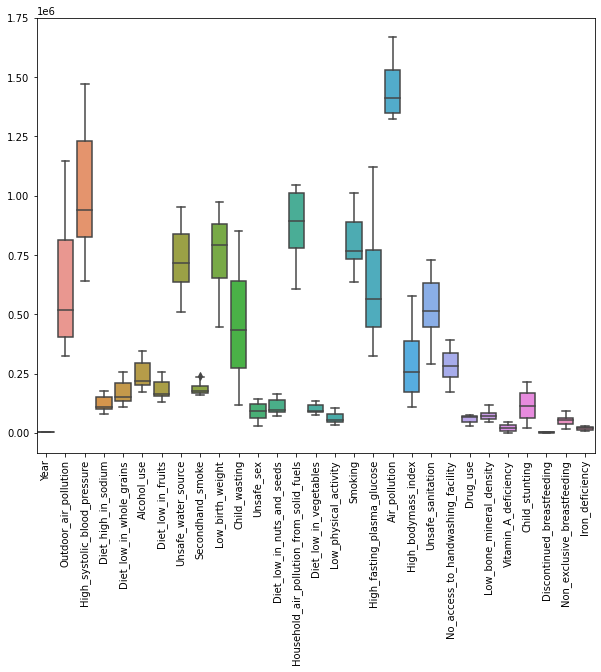

In [208]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[df.Entity=='India'])
plt.xticks(rotation=90)
plt.show()   # Boxplot across various segments for India


The above boxplot is plotted to see if the data exhibits any skewness or any outliers or variance across the segments of data. As can be seen from the plots plotted between our Top contributors, namely, India and China, we can observe that while <span style='background:#808080'>**`High systolic pressure`**</span> being the top most contributor of deaths in <span style='background:#808080'>**`China`**</span>, it  is the second major contributor of deaths for the latter. <span style='background:#808080'>**`Smoking`**</span> is the major contributor of deaths in <span style='background:#808080'>**`India`**</span> while it is the second major factor in China which is a shear co-incidence.

### The following plots are plotted to identify which transformations suits best for transforming our data to the normal distribution

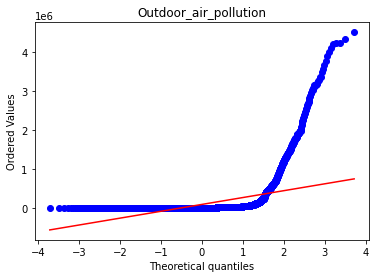

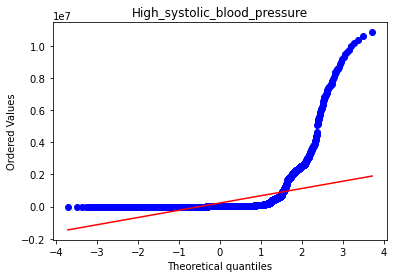

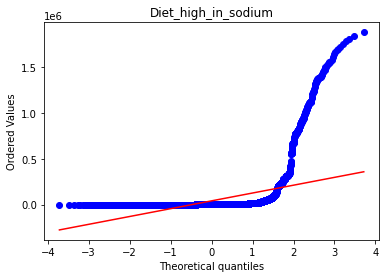

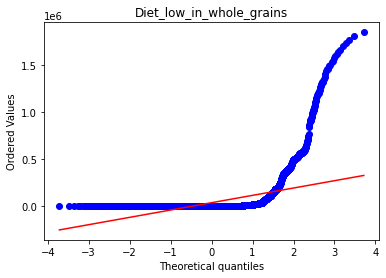

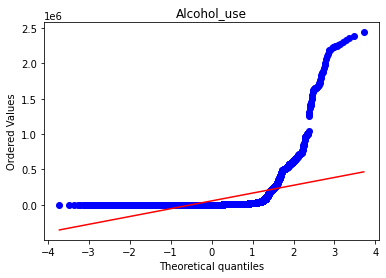

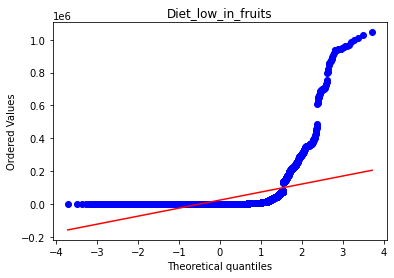

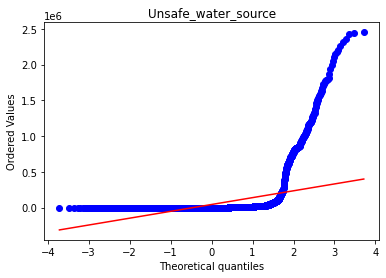

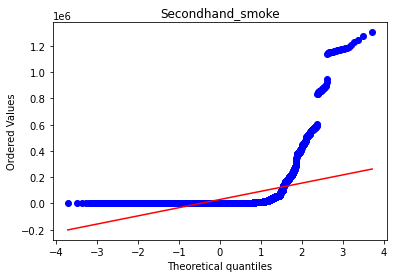

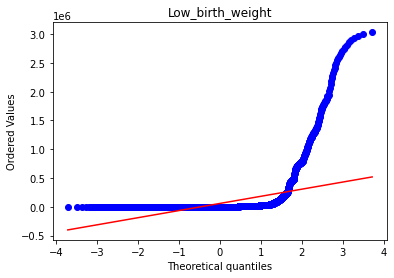

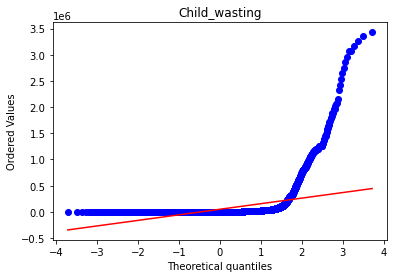

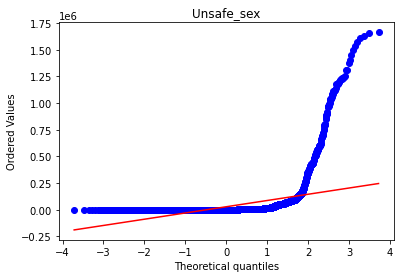

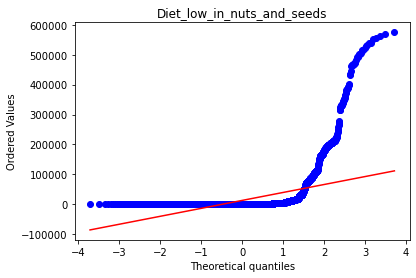

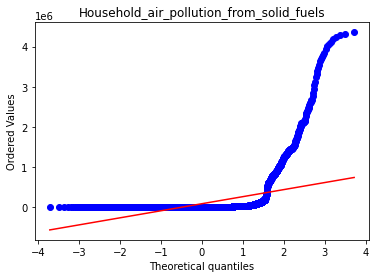

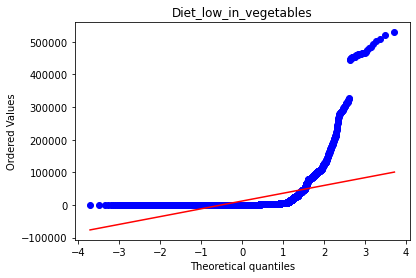

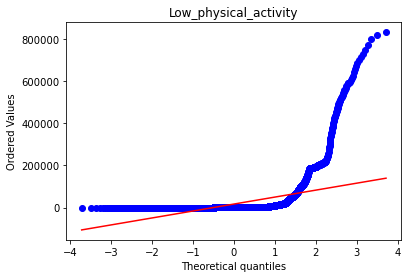

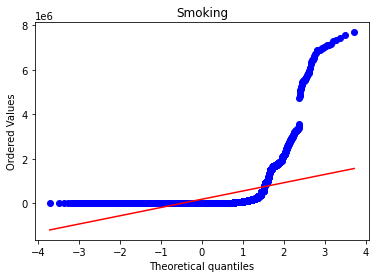

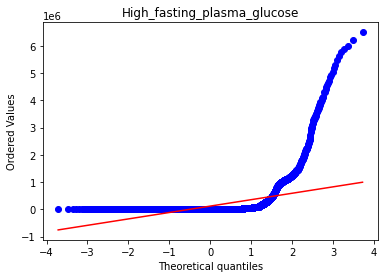

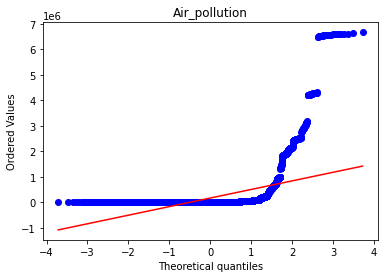

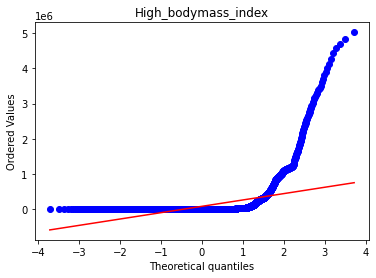

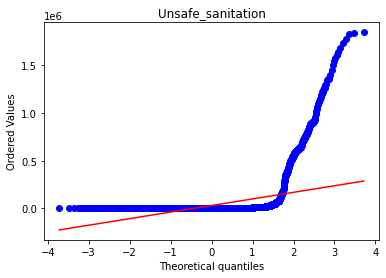

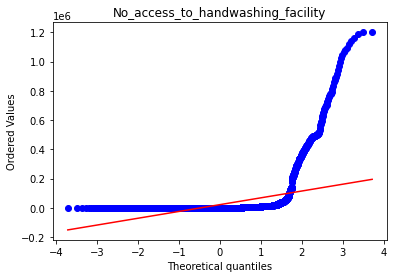

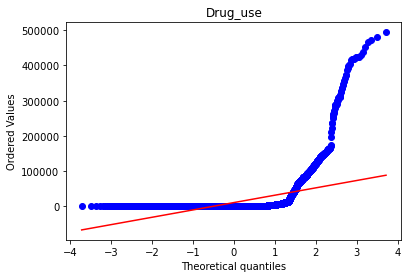

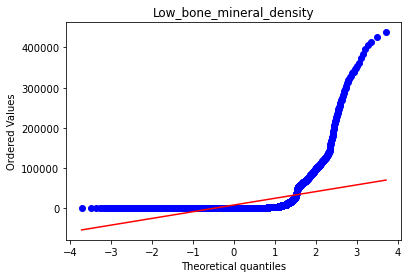

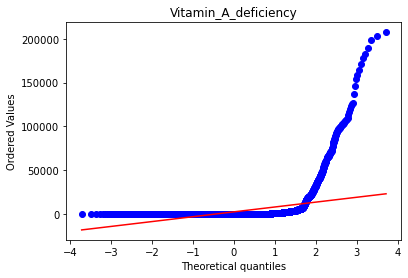

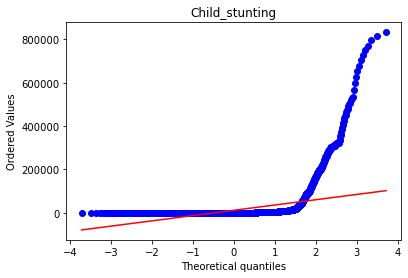

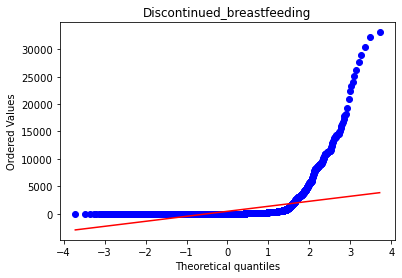

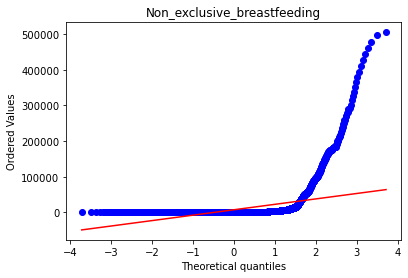

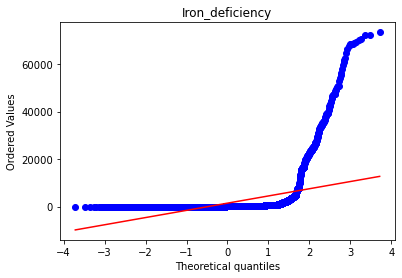

In [249]:
# Normal Distribution plot
for i in df.columns[3:]:
    ss.probplot(df['{}'.format(i)],dist='norm', plot=plt)
    plt.title('{}'.format(i))
    plt.show()

`It can be observed that the data in each segment of the data set is not distributed normally and majority of the data is right skewed.`

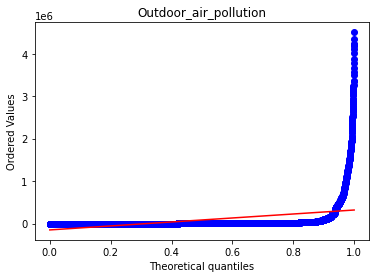

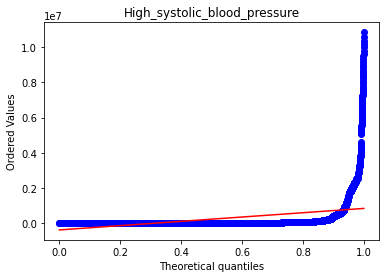

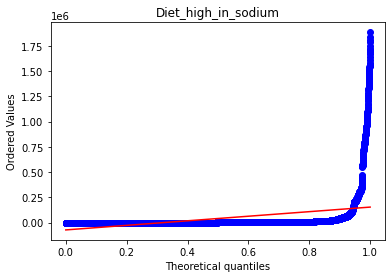

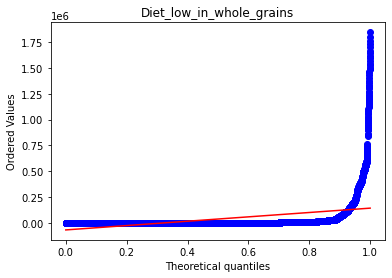

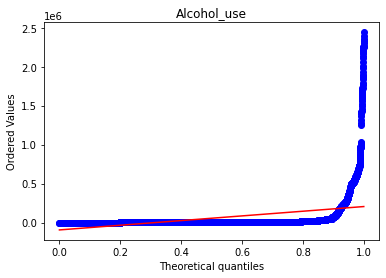

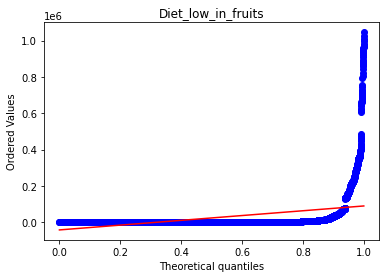

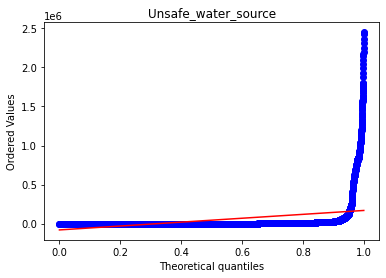

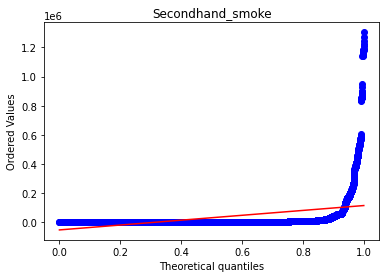

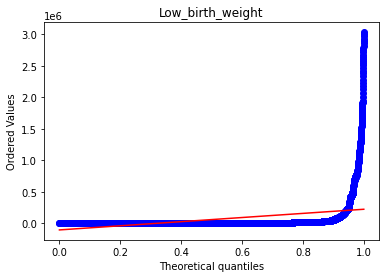

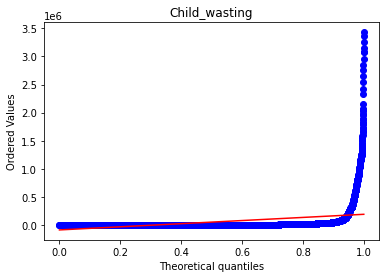

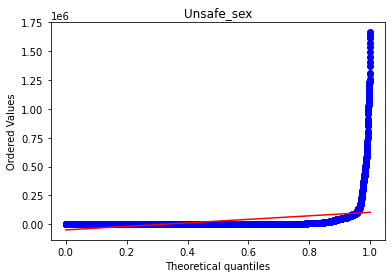

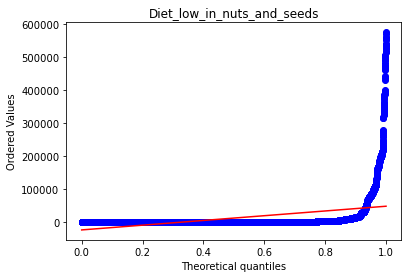

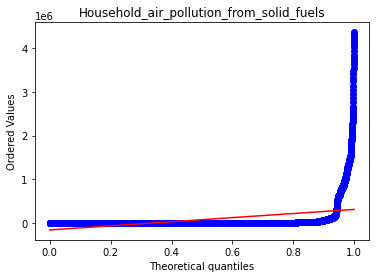

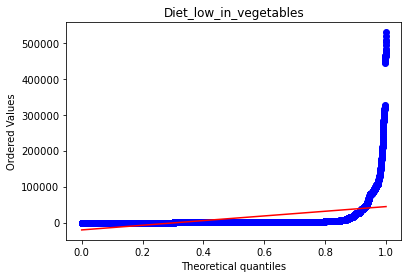

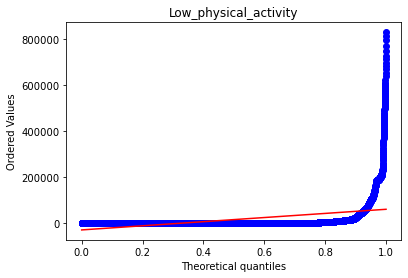

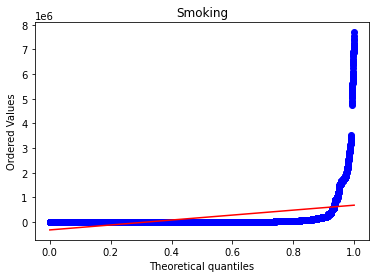

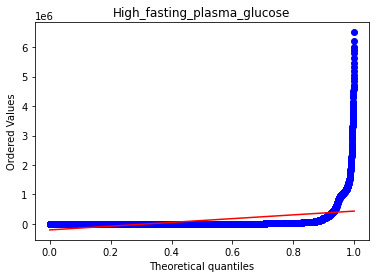

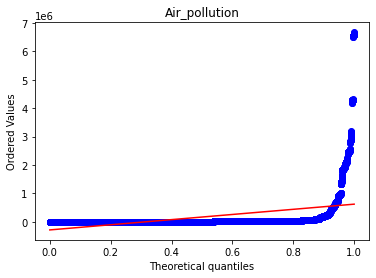

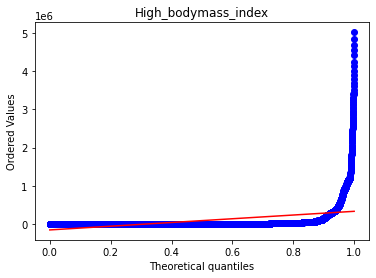

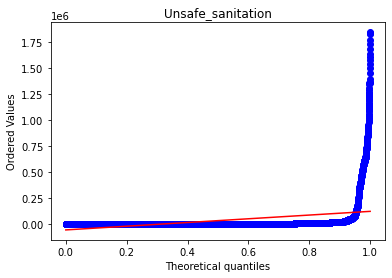

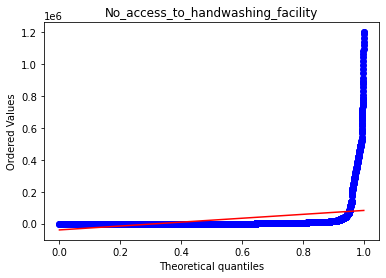

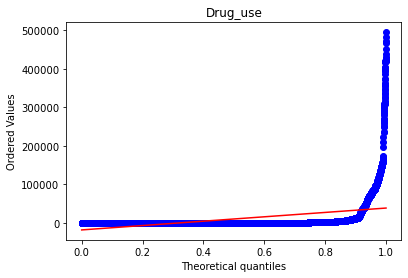

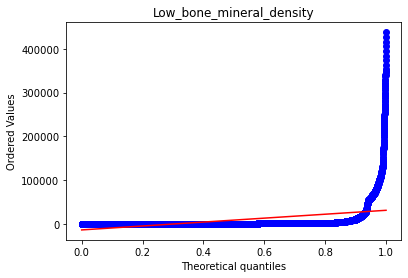

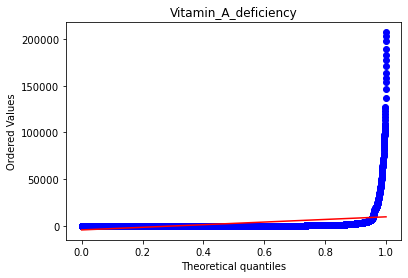

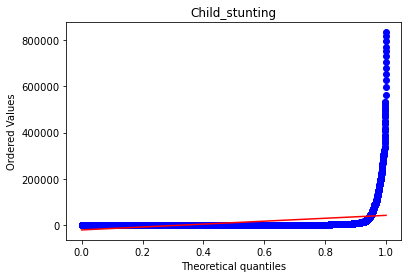

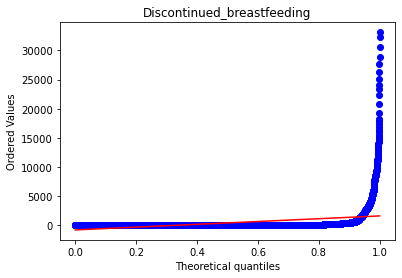

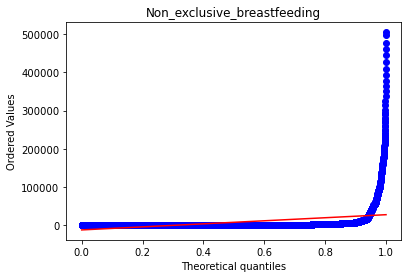

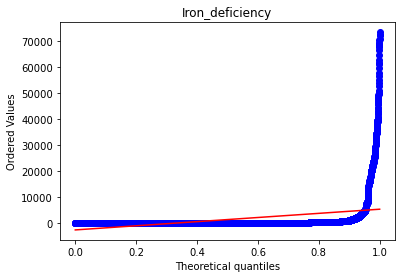

In [250]:
# Uniform Distribution plot
for i in df.columns[3:]:
    ss.probplot(df['{}'.format(i)],dist='uniform', plot=plt)
    plt.title('{}'.format(i))
    plt.show()

In order to classify the data set to be discrete or constinuous we need have finite values, but we can't assume any finite range that fits the data. So, the dataset can't be classified as either.
`It can be observed that the data in each segment of the data set is party distributed uniformly which is increasing linearly towards the end which then has a dramatich spike.`

The same can be identified plotting histogram against the density of the values in the dataset. The graph might look different but the meaning it conveys would be same.

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


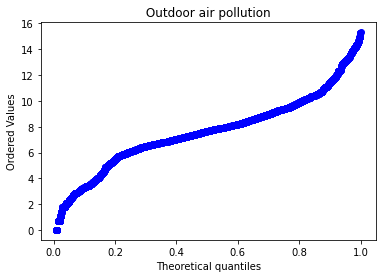

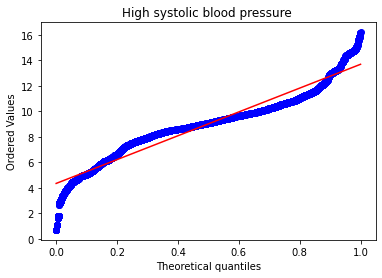

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


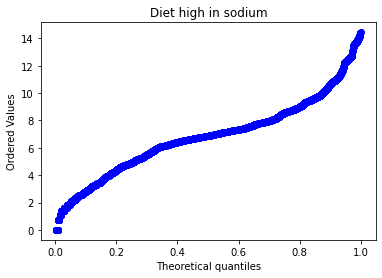

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


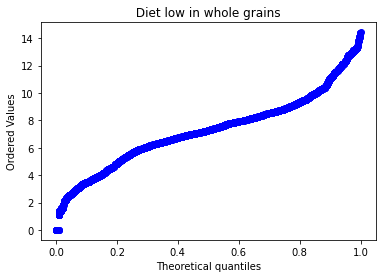

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


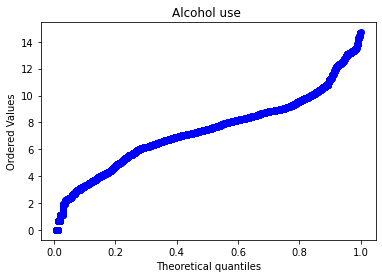

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


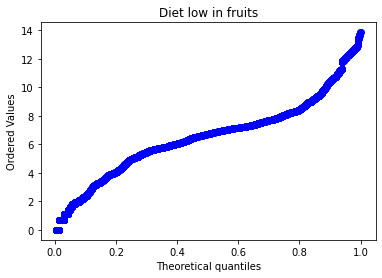

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


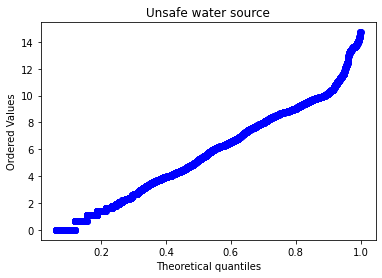

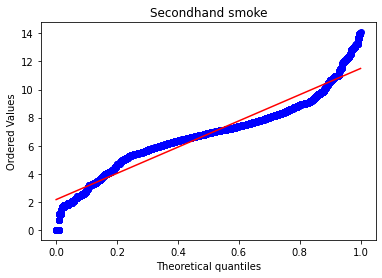

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


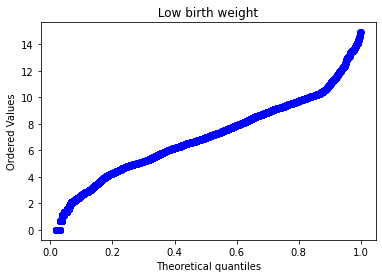

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


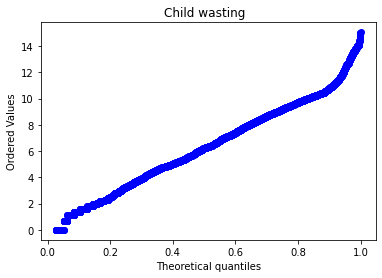

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


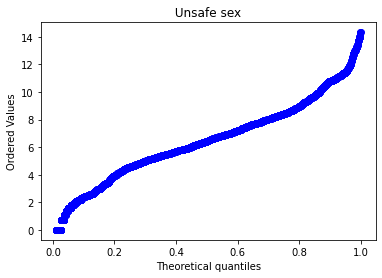

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


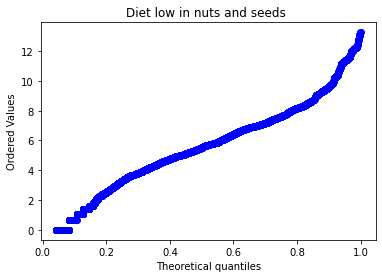

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


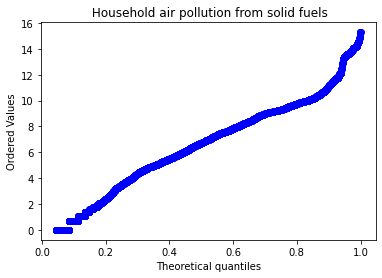

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


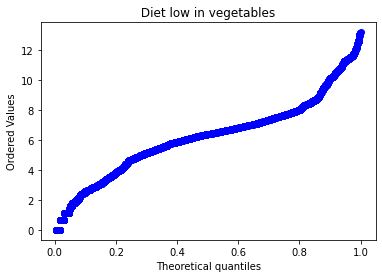

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


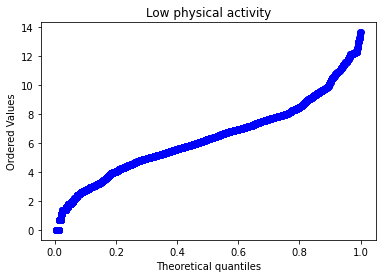

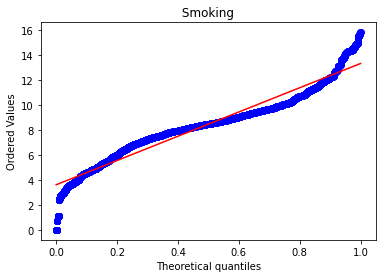

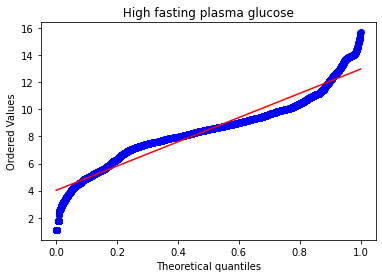

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


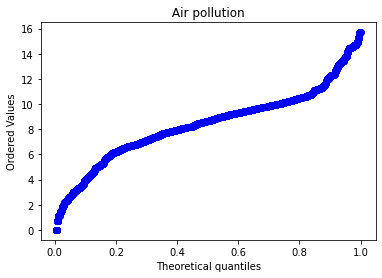

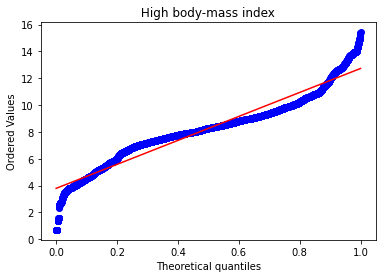

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


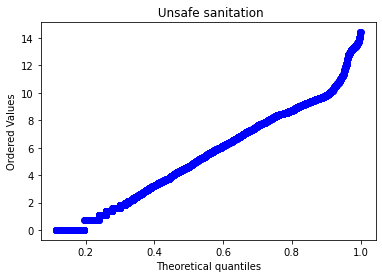

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


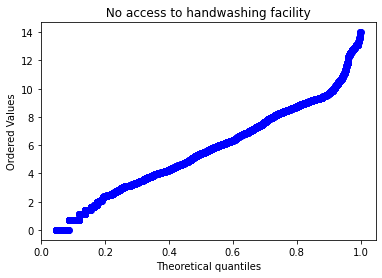

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


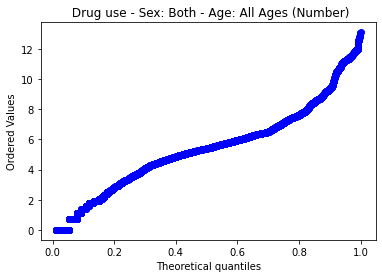

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


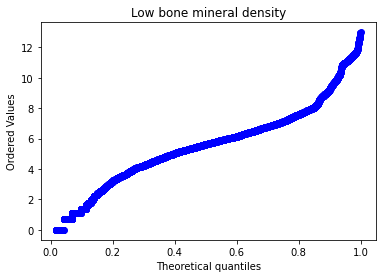

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


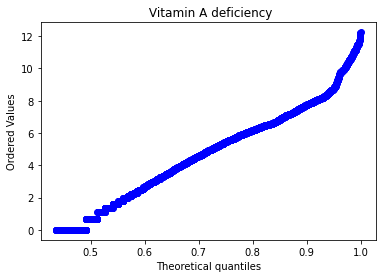

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


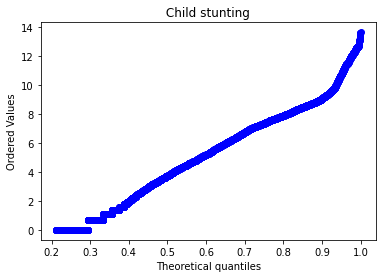

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


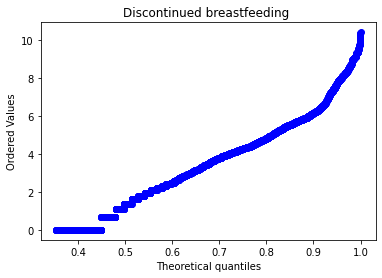

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


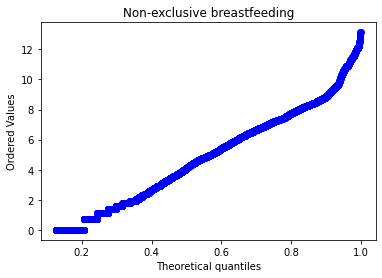

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


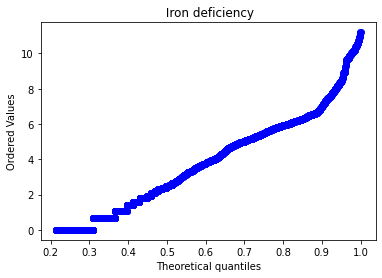

In [15]:
# Log-Normal Distribution plot
for i in df.columns[3:]:
    ss.probplot(np.log(df['{}'.format(i)]),dist='uniform', plot=plt)
    plt.title('{}'.format(i))
    plt.show()

The above Log-Normal Distribution plot is to see if it can transform out data set into Normal Distribution. It can be observed that, when compared to the earlier transformations, it's a bit successful in transforming the data to a normal distrubution. Though, it's not an exact Normal Distribution, there's a bit linearity in the data which's a good thing to note.

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


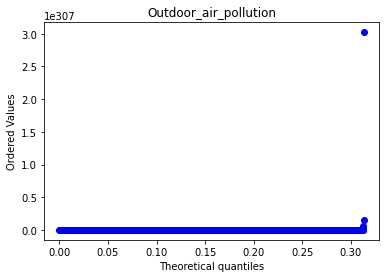

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


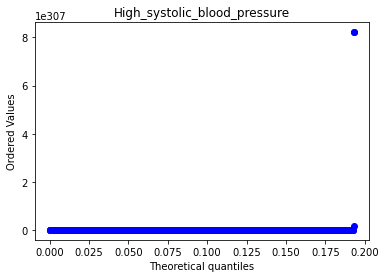

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


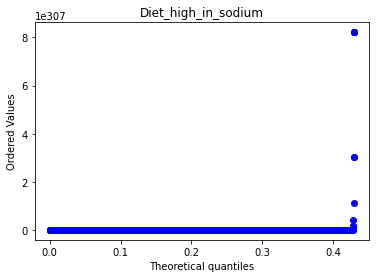

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


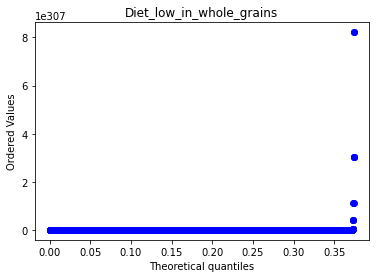

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


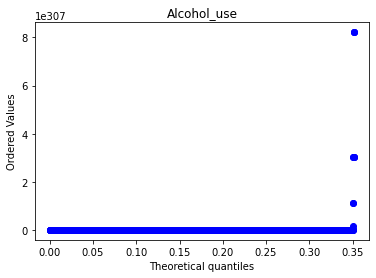

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


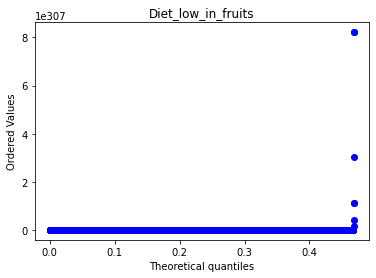

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


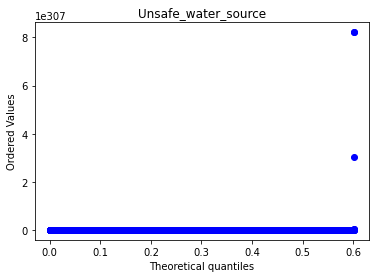

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


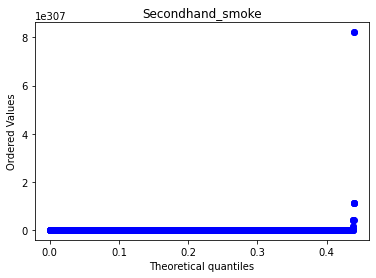

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


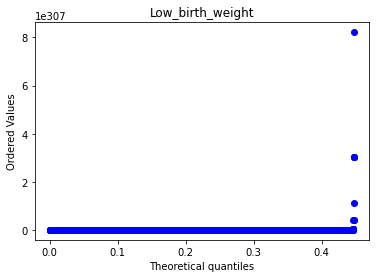

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


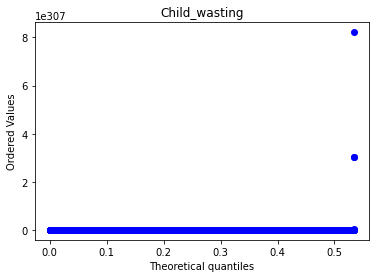

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


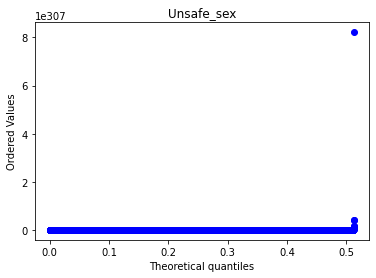

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


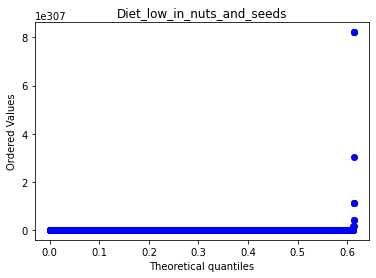

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


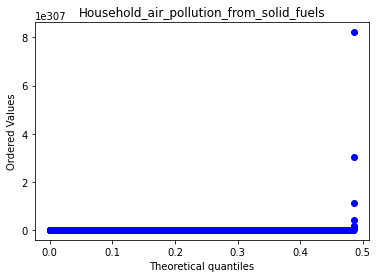

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


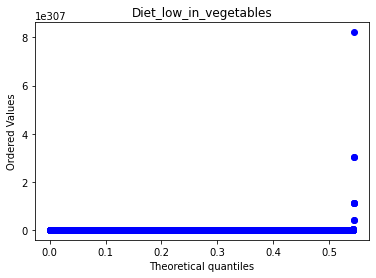

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


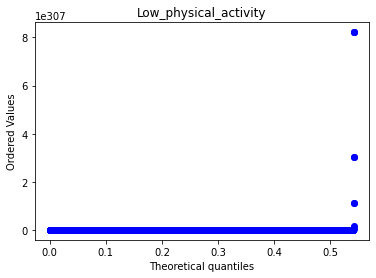

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


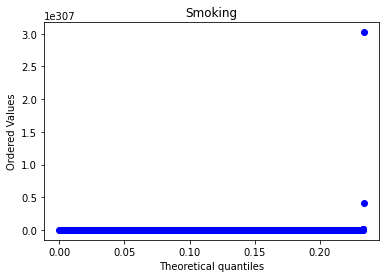

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


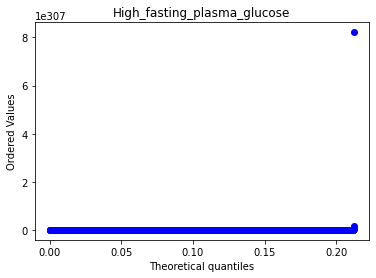

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


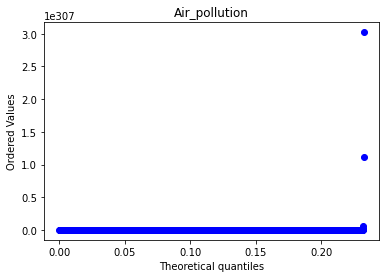

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


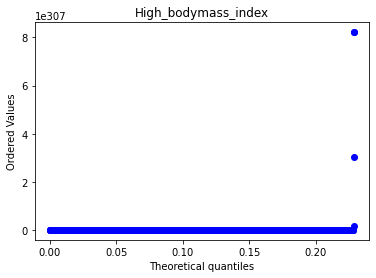

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


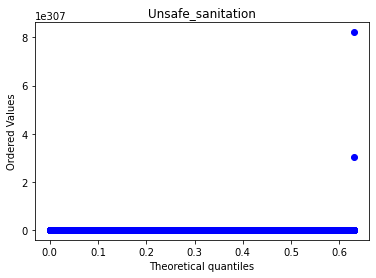

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


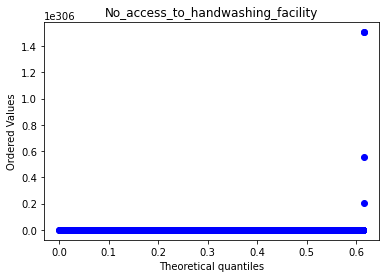

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


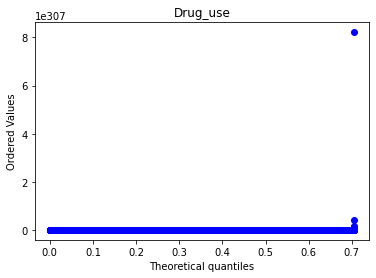

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


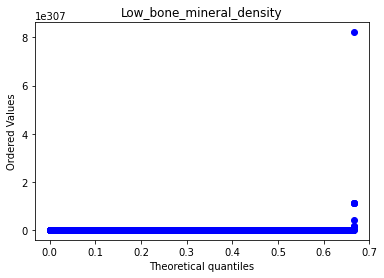

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


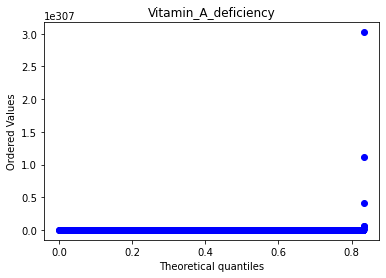

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


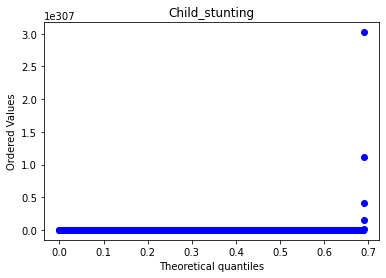

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


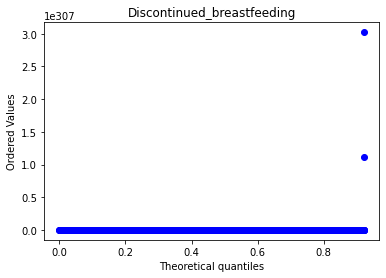

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


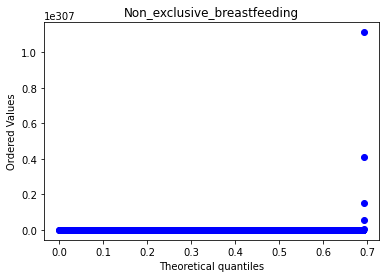

C:\Users\vivek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vivek\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\vivek\anaconda3\lib\site-packages\matplotlib\ticker.py:2072: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


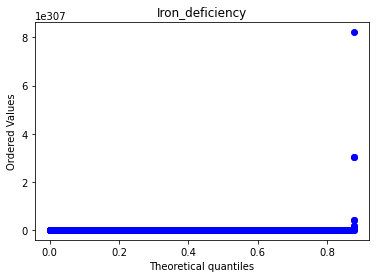

In [253]:
# Exponential Distribution plot
for i in df.columns[3:]:
    ss.probplot(np.exp(df['{}'.format(i)]),dist='uniform', plot=plt)
    plt.title('{}'.format(i))
    plt.show()

The above Exponential Distribution plot is to see if it can transform out data set into Normal Distribution and it can be seen that it is not that useful. Instead it has drawn out uniformity among the data.

###  Q-Q plot

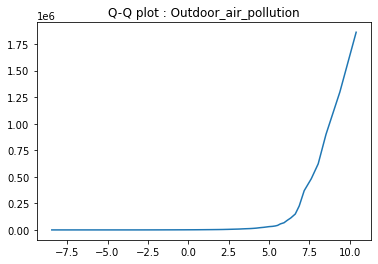

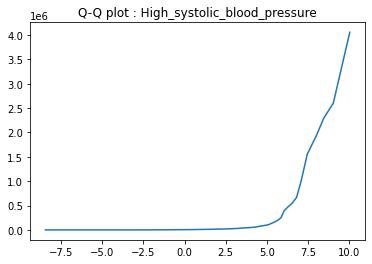

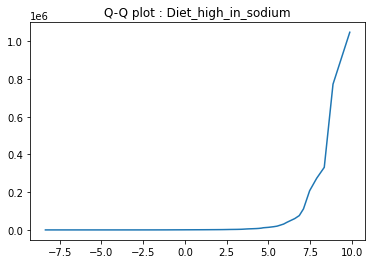

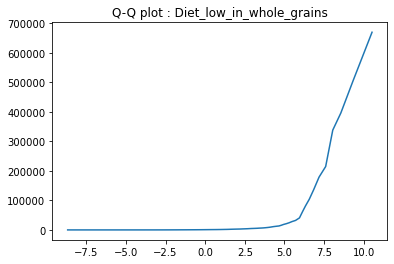

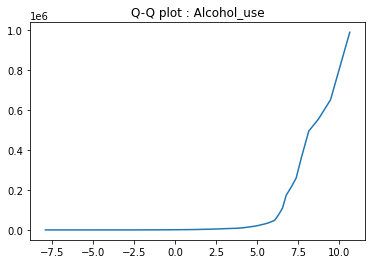

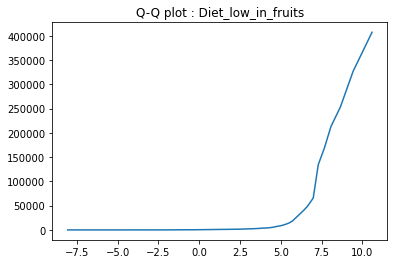

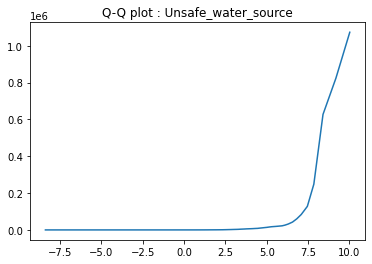

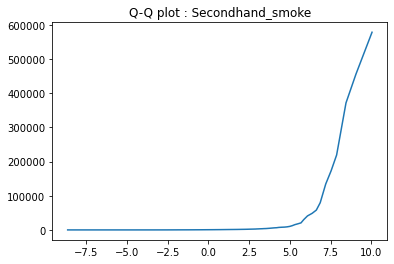

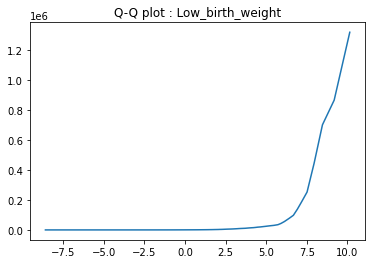

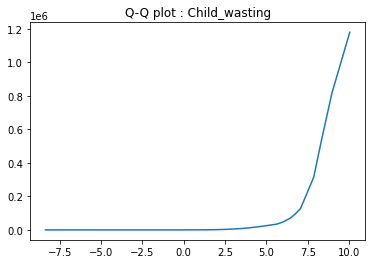

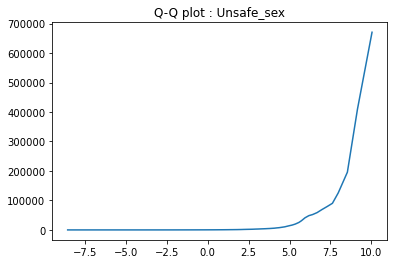

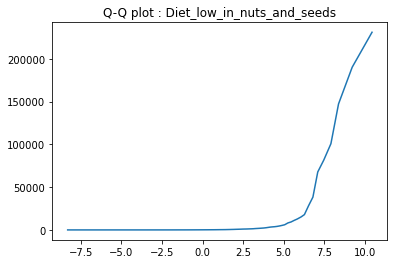

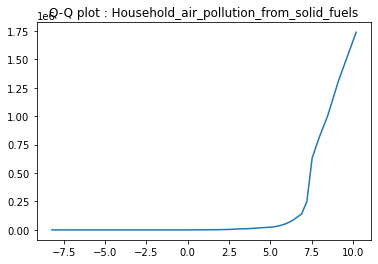

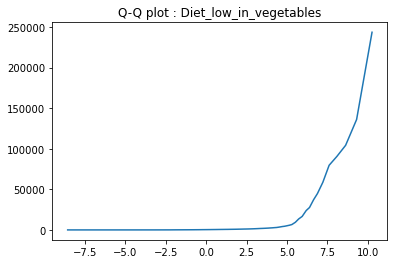

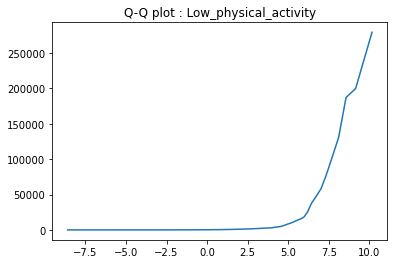

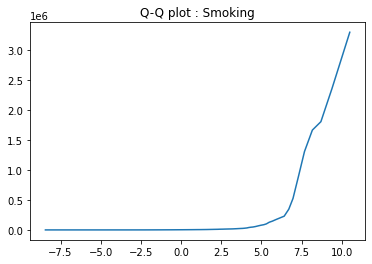

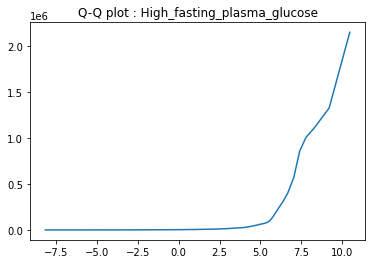

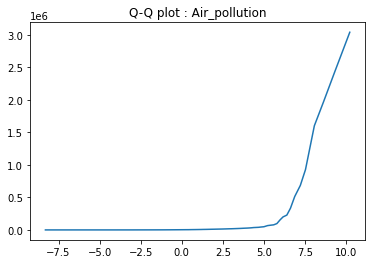

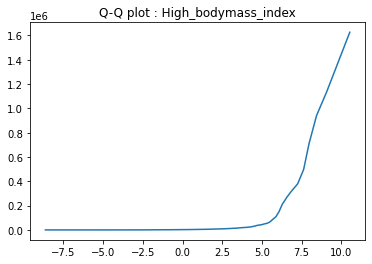

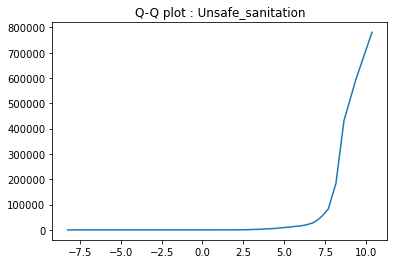

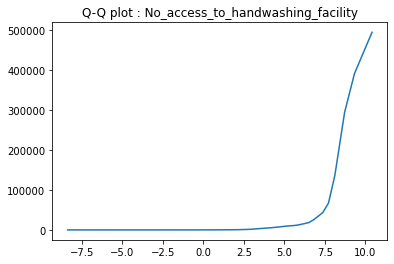

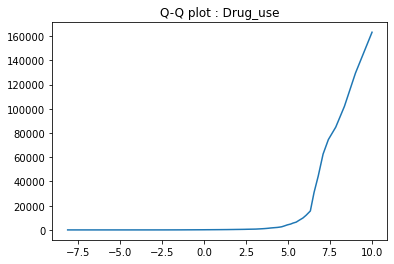

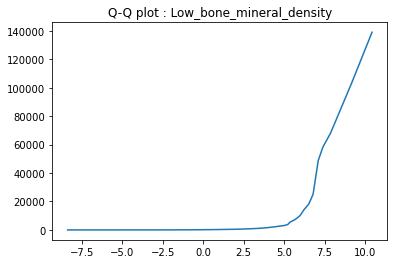

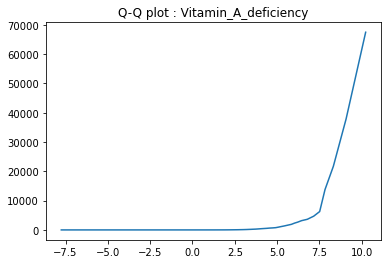

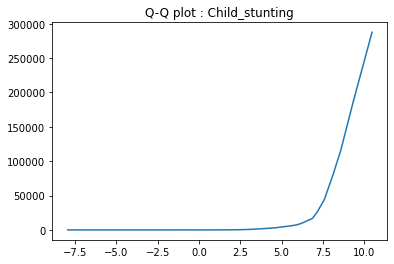

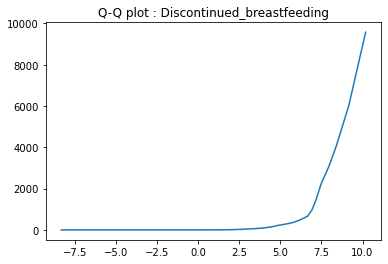

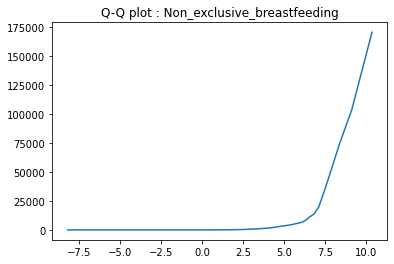

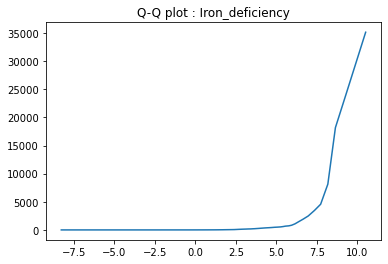

In [75]:
# Q-Q plot
for i in df.columns[3:]:
    plt.plot(np.percentile([rd.normalvariate(1,4) for i in range(1,6841)],[i for i in range(1, 100)]),np.percentile(df['{}'.format(i)],[i for i in range(1, 100)]) )
    plt.title('Q-Q plot : {}'.format(i))
    plt.show()

The Q-Q plot (also known as `quantile-quantile plot`) is used to see if the plot is normally distributed or not. It draws a comparision between known normally distributed data to verify that. In the above plot, numpy is used to generate normally distributed data of the similar size to the data set and is plotted by dividing it into quantiles, Hence, the name Q-Q.

As is inferred form the earlier plots, it is not normally distributed and is right skewed.

In [28]:
#Function to identify the best possible n value
def best_n(a,sample_means=40, sample_size=30):
    # following the assumptions of the CLT theorem where sample size shouldn't be >10% of population
    size=(len(a)*10/100)//sample_size 
    itr=sample_size
    for i in range(1,int(size+1)):
        s=[]
        for i in range(sample_means):
            s.append(np.mean(rd.choices(a,k=sample_size)))
        sns.kdeplot(s)
        plt.title(f'{a} : n={sample_size}')
        sample_size+=itr
        plt.show()

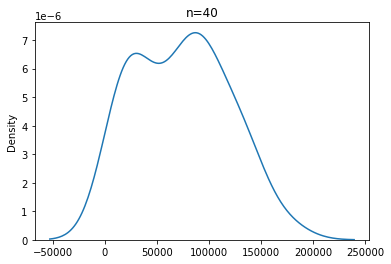

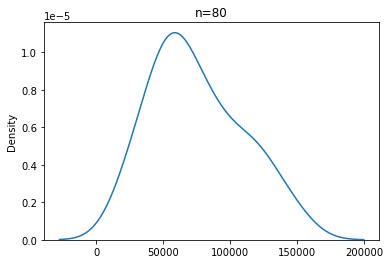

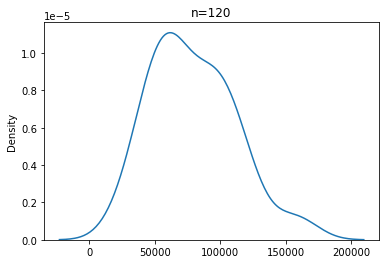

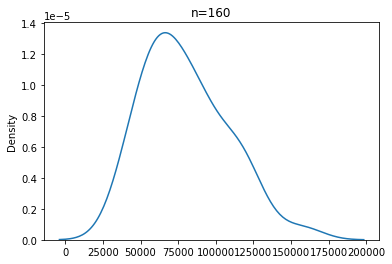

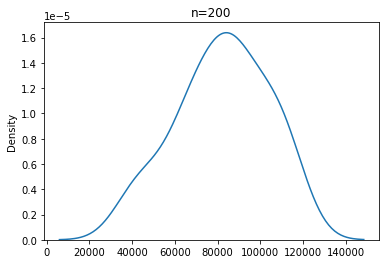

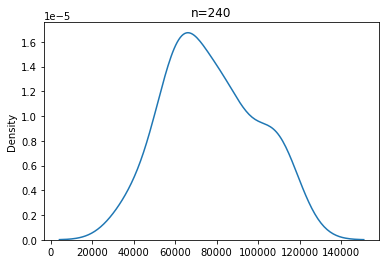

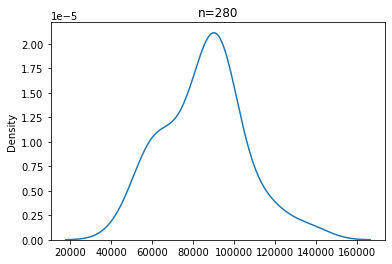

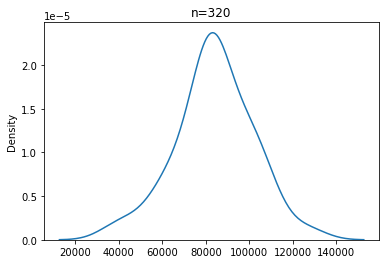

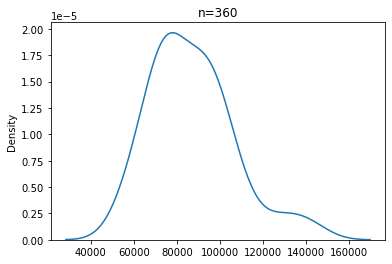

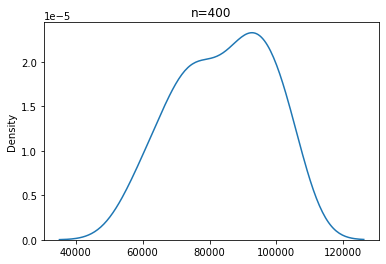

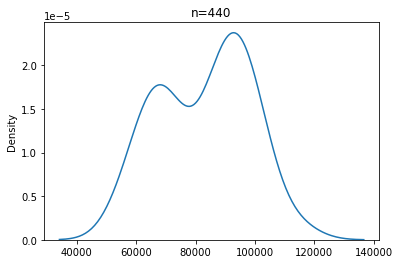

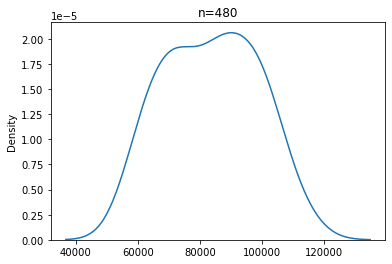

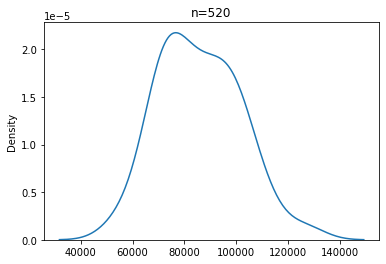

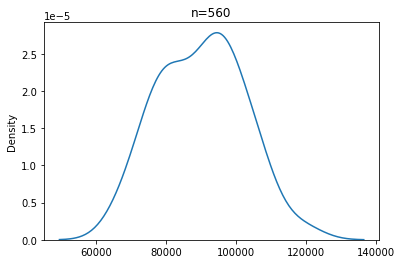

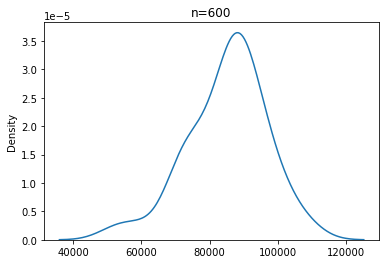

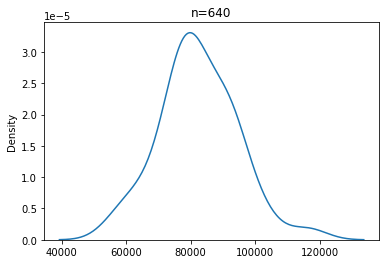

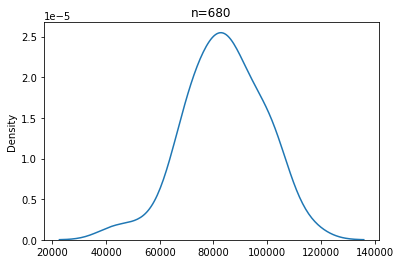

In [57]:
best_n(df.Outdoor_air_pollution,40,40)

##### From the above plot we can interpret that the 'CLT' holds approximately true for `Outdoor_air_pollution`  at `sample sizes: 320, 640,680`

#### Z-Score:

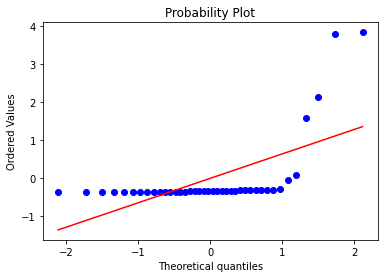

In [95]:
ss.probplot(ss.zscore(x),plot=plt)
plt.show()

In [5]:
#converting the data set into individual files
st=time.time()
for i in range(6840):
    df[i:(i+1)].to_csv(r'data2\file{}.csv'.format(i))
et=time.time()
print(f'time elapsed:{et-st} seconds')

time elapsed:9.465907335281372 seconds


## Alternative ways to load multiple .csv files

In [45]:
# Using DASK
st=time.time()
import dask.dataframe as dd
df1 = dd.read_csv(r'data1\*.csv')
et=time.time()
print(f'time elapsed:{et-st} seconds')

time elapsed:1.6310667991638184 seconds


In [46]:
st=time.time()
df1.compute()
et=time.time()
print(f'time elapsed:{et-st} seconds')

time elapsed:22.983521699905396 seconds


In [54]:
# Using GLOB
import glob
st=time.time()
path = glob.glob(r"data1/*.csv")
df2= pd.concat((pd.read_csv(file) for file in path), ignore_index=True)
et=time.time()
print(f'time elapsed:{et-st} seconds')

time elapsed:10.51198935508728 seconds


In [77]:
# Using OS
import os
st=time.time()
path, dirs, files = next(os.walk(r"./data1/"))
df3= pd.concat((pd.read_csv(f"data1\{file}") for file in files), ignore_index=True)
et=time.time()
print(f'time elapsed:{et-st} seconds')

time elapsed:10.77278733253479 seconds


### Upon observing the time taken by each method, it can be summarized that `GLOB > OS > DASK >> Indigenous                                         Forloop ` in terms of efficiency